In [2]:
# import pandas as pd
# import numpy as np
# from fbprophet import Prophet
# import matplotlib.pyplot as plt
# import tushare as ts


# de=ts.get_hist_data('002230',start='2017-01-01',end='2019-12-31')

# df=pd.DataFrame()

# df['y']=de['open']
# df['ds']=list(de.index)

# # ÂÆö‰πâÊ®°Âûã
# m = Prophet()

# # ËÆ≠ÁªÉÊ®°Âûã
# m.fit(df)

# # ÊûÑÂª∫È¢ÑÊµãÈõÜ
# future = m.make_future_dataframe(periods=60)
# print (future.tail())

# # ËøõË°åÈ¢ÑÊµã
# forecast = m.predict(future)

# m.plot(forecast)
# plt.show()


In [80]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas_datareader as pdr
from matplotlib import font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from plotly import tools
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [81]:
import lightgbm as lgb
from sklearn import svm, datasets
import gc
from time import time
from datetime import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')
sns.set()
plt.style.use('fivethirtyeight') 
import os, sys, gc, warnings, random
from catboost import CatBoostClassifier, Pool, cv

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



In [3]:
#pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

## Áî®baostockËé∑ÂèñAËÇ°Êï∞ÊçÆ

### ÁôªÂΩï
login()
ÊñπÊ≥ïËØ¥ÊòéÔºöÁôªÂΩïÁ≥ªÁªü„ÄÇ

‰ΩøÁî®Á§∫‰æãÔºölg = login()

ËøîÂõû‰ø°ÊÅØÔºö

lg.error_codeÔºöÈîôËØØ‰ª£Á†ÅÔºåÂΩì‰∏∫‚Äú0‚ÄùÊó∂Ë°®Á§∫ÊàêÂäüÔºåÂΩì‰∏∫Èùû0Êó∂Ë°®Á§∫Â§±Ë¥•Ôºõ
lg.error_msgÔºöÈîôËØØ‰ø°ÊÅØÔºåÂØπÈîôËØØÁöÑËØ¶ÁªÜËß£Èáä„ÄÇ
### ÁôªÂá∫
logout()
ÊñπÊ≥ïËØ¥ÊòéÔºöÁôªÂá∫Á≥ªÁªü

‰ΩøÁî®Á§∫‰æãÔºölg = logout()

ËøîÂõû‰ø°ÊÅØÔºö

lg.error_codeÔºöÈîôËØØ‰ª£Á†ÅÔºåÂΩì‰∏∫‚Äú0‚ÄùÊó∂Ë°®Á§∫ÊàêÂäüÔºåÂΩì‰∏∫Èùû0Êó∂Ë°®Á§∫Â§±Ë¥•Ôºõ
lg.error_msgÔºöÈîôËØØ‰ø°ÊÅØÔºåÂØπÈîôËØØÁöÑËØ¶ÁªÜËß£Èáä

### Ëé∑ÂèñÂéÜÂè≤AËÇ°KÁ∫øÊï∞ÊçÆ
Ëé∑ÂèñÂéÜÂè≤AËÇ°KÁ∫øÊï∞ÊçÆÔºöquery_history_k_data_plus()
ÊñπÊ≥ïËØ¥ÊòéÔºöÈÄöËøáAPIÊé•Âè£Ëé∑ÂèñAËÇ°ÂéÜÂè≤‰∫§ÊòìÊï∞ÊçÆÔºàÂåÖÊã¨ÂùáÁ∫øÊï∞ÊçÆÔºâÔºåÂèØ‰ª•ÈÄöËøáÂèÇÊï∞ËÆæÁΩÆËé∑ÂèñÊó•kÁ∫ø„ÄÅÂë®kÁ∫ø„ÄÅÊúàkÁ∫øÔºå‰ª•Âèä5ÂàÜÈíü„ÄÅ15ÂàÜÈíü„ÄÅ30ÂàÜÈíüÂíå60ÂàÜÈíükÁ∫øÊï∞ÊçÆÔºåÈÄÇÂêàÊê≠ÈÖçÂùáÁ∫øÊï∞ÊçÆËøõË°åÈÄâËÇ°ÂíåÂàÜÊûê„ÄÇ

ËøîÂõûÁ±ªÂûãÔºöpandasÁöÑDataFrameÁ±ªÂûã„ÄÇ

ËÉΩËé∑Âèñ2006-01-01Ëá≥ÂΩìÂâçÊó∂Èó¥ÁöÑÊï∞ÊçÆÔºõ

ÂèØÊü•ËØ¢‰∏çÂ§çÊùÉ„ÄÅÂâçÂ§çÊùÉ„ÄÅÂêéÂ§çÊùÉÊï∞ÊçÆ„ÄÇ

In [4]:
def get_stocks_data(stkname, code):    
    import baostock as bs

    #### ÁôªÈôÜÁ≥ªÁªü ####
    lg = bs.login()
    # ÊòæÁ§∫ÁôªÈôÜËøîÂõû‰ø°ÊÅØ
    print('login respond error_code:'+lg.error_code)
    print('login respond  error_msg:'+lg.error_msg)

    #### Ëé∑ÂèñÂéÜÂè≤KÁ∫øÊï∞ÊçÆ ####
    # ËØ¶ÁªÜÊåáÊ†áÂèÇÊï∞ÔºåÂèÇËßÅ‚ÄúÂéÜÂè≤Ë°åÊÉÖÊåáÊ†áÂèÇÊï∞‚ÄùÁ´†ËäÇ
#     stkname = ["sz.002230", "sz.399905",'sz.002680']
    rs = []
    #### ÊâìÂç∞ÁªìÊûúÈõÜ ####
    data_list = []
    for i in range(len(code)):
        rs = bs.query_history_k_data_plus(code[i],
            "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST",
            start_date='2019-01-01', end_date='2020-01-21', frequency="d", adjustflag="3") #frequency="d"ÂèñÊó•kÁ∫øÔºåadjustflag="3"ÈªòËÆ§‰∏çÂ§çÊùÉ

        while (rs.error_code == '0') & rs.next():
            # Ëé∑Âèñ‰∏ÄÊù°ËÆ∞ÂΩïÔºåÂ∞ÜËÆ∞ÂΩïÂêàÂπ∂Âú®‰∏ÄËµ∑
            data_list.append(rs.get_row_data())
        result = pd.DataFrame(data_list, columns=rs.fields)
        #### ÁªìÊûúÈõÜËæìÂá∫Âà∞csvÊñá‰ª∂ ####
    filename = f'{stkname}_stocks_data.csv'
    result.to_csv(filename, encoding="gbk", index=False)
#     print(result)
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
    return result

    #### ÁôªÂá∫Á≥ªÁªü ####
    bs.logout()

In [64]:
# get_stocks_data('‰∏äËØÅÊåáÊï∞',['sh.000001'])
sz300 = pd.read_csv('‰∏äËØÅÊåáÊï∞_stocks_data.csv', index_col='date', parse_dates=['date'])
sz300.head()

code      open      high       low     close  preclose  \
date                                                                      
2019-01-02  sh.000001  2497.880  2500.278  2456.423  2465.291  2493.896   
2019-01-03  sh.000001  2461.782  2488.479  2455.925  2464.362  2465.291   
2019-01-04  sh.000001  2446.019  2515.316  2440.906  2514.868  2464.362   
2019-01-07  sh.000001  2528.698  2536.977  2515.508  2533.088  2514.868   
2019-01-08  sh.000001  2530.300  2531.345  2520.164  2526.462  2533.088   

                 volume        amount  adjustflag      turn  tradestatus  \
date                                                                       
2019-01-02  10993201408  9.759257e+10           3  0.328717            1   
2019-01-03  12439749632  1.069228e+11           3  0.371963            1   
2019-01-04  16887766784  1.392987e+11           3  0.504935            1   
2019-01-07  17730501120  1.455132e+11           3  0.530082            1   
2019-01-08  15809918208  1.233790e+11           3  0.472663            1   

            pctChg  peTTM  pbMRQ  psTTM  pcfNcfTTM  isST  
date                                                      
2019-01-02 -1.1470    0.0    0.0    0.0        0.0     0  
2019-01-03 -0.0377    0.0    0.0    0.0        0.0     0  
2019-01-04  2.0494    0.0    0.0    0.0        0.0     0  
2019-01-07  0.7245    0.0    0.0    0.0        0.0     0  
2019-01-08 -0.2616    0.0    0.0    0.0        0.0     0

In [65]:
# get_stocks_data('kdxf', ['sz.002230'])
result = pd.read_csv('kdxf_stocks_data.csv', index_col='date', parse_dates=['date'])
result.head()

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   
2019-01-07  sz.002230  27.49  29.58  27.20  29.27     27.13  81114177   
2019-01-08  sz.002230  29.39  29.88  28.60  29.02     29.27  57752434   

                  amount  adjustflag      turn  tradestatus    pctChg  \
date                                                                    
2019-01-02  8.256631e+08           3  1.805117            1  1.623383   
2019-01-03  1.061824e+09           3  2.291008            1  1.597443   
2019-01-04  1.806189e+09           3  3.758034            1  6.643076   
2019-01-07  2.326280e+09           3  4.451259            1  7.887952   
2019-01-08  1.679223e+09           3  3.169249            1 -0.854117   

                 peTTM     pbMRQ     psTTM  pcfNcfTTM  isST  
date                                                         
2019-01-02  107.999223  6.832481  7.137286 -67.064552     0  
2019-01-03  109.724451  6.941626  7.251300 -68.135871     0  
2019-01-04  117.013536  7.402764  7.733009 -72.662192     0  
2019-01-07  126.243501  7.986690  8.342985 -78.393748     0  
2019-01-08  125.165234  7.918474  8.271726 -77.724173     0

In [66]:
kdxf = result
del kdxf['adjustflag']
del kdxf['isST']
del kdxf['tradestatus']

In [67]:
kdxf = pd.merge(kdxf,sz300['close'],left_index=True,right_index=True)
# kdxf['close'] = kdxf['close_x']
# kdxf['close_sz300'] = kdxf['close_y']
# del kdxf['close_y'] 
# del kdxf['close_x']

kdxf.head(3)

code   open   high    low  close_x  preclose    volume  \
date                                                                      
2019-01-02  sz.002230  24.63  25.35  24.61    25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88    25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01    27.13     25.44  68481699   

                  amount      turn    pctChg       peTTM     pbMRQ     psTTM  \
date                                                                           
2019-01-02  8.256631e+08  1.805117  1.623383  107.999223  6.832481  7.137286   
2019-01-03  1.061824e+09  2.291008  1.597443  109.724451  6.941626  7.251300   
2019-01-04  1.806189e+09  3.758034  6.643076  117.013536  7.402764  7.733009   

            pcfNcfTTM   close_y  
date                             
2019-01-02 -67.064552  2465.291  
2019-01-03 -68.135871  2464.362  
2019-01-04 -72.662192  2514.868

In [68]:
kdxf.columns=['code','open','high','low','close','preclose','volume','amount','turn','pctChg','peTTM','pbMRQ','psTTM','pcfNcfTTM','close_sz300']
kdxf.head()

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   
2019-01-07  sz.002230  27.49  29.58  27.20  29.27     27.13  81114177   
2019-01-08  sz.002230  29.39  29.88  28.60  29.02     29.27  57752434   

                  amount      turn    pctChg       peTTM     pbMRQ     psTTM  \
date                                                                           
2019-01-02  8.256631e+08  1.805117  1.623383  107.999223  6.832481  7.137286   
2019-01-03  1.061824e+09  2.291008  1.597443  109.724451  6.941626  7.251300   
2019-01-04  1.806189e+09  3.758034  6.643076  117.013536  7.402764  7.733009   
2019-01-07  2.326280e+09  4.451259  7.887952  126.243501  7.986690  8.342985   
2019-01-08  1.679223e+09  3.169249 -0.854117  125.165234  7.918474  8.271726   

            pcfNcfTTM  close_sz300  
date                                
2019-01-02 -67.064552     2465.291  
2019-01-03 -68.135871     2464.362  
2019-01-04 -72.662192     2514.868  
2019-01-07 -78.393748     2533.088  
2019-01-08 -77.724173     2526.462

In [69]:
kdxf['withoutsz300'] = kdxf['close'] - kdxf['close_sz300']/kdxf['close_sz300'].mean()*kdxf['close'].mean()

In [85]:
kdxf['date'] = kdxf.index
# del kdxf['code']
# del kdxf['open']
# del kdxf['low']
# del kdxf['high']
del kdxf['preclose']
kdxf.head(3)

close    volume      turn    pctChg       peTTM     pbMRQ  \
date                                                                    
2019-01-02  25.04  32894190  1.805117  1.623383  107.999223  6.832481   
2019-01-03  25.44  41748458  2.291008  1.597443  109.724451  6.941626   
2019-01-04  27.13  68481699  3.758034  6.643076  117.013536  7.402764   

               psTTM  pcfNcfTTM  close_sz300  withoutsz300       date  \
date                                                                    
2019-01-02  7.137286 -67.064552     2465.291     -2.619198 2019-01-02   
2019-01-03  7.251300 -68.135871     2464.362     -2.208776 2019-01-03   
2019-01-04  7.733009 -72.662192     2514.868     -1.085425 2019-01-04   

            attention  
date                   
2019-01-02        105  
2019-01-03        107  
2019-01-04        142

In [95]:
kdxf.to_csv('mkt_data.csv',index=False)

ÂèÇÊï∞Âê´‰πâÔºö

- codeÔºöËÇ°Á•®‰ª£Á†ÅÔºåshÊàñsz.+6‰ΩçÊï∞Â≠ó‰ª£Á†ÅÔºåÊàñËÄÖÊåáÊï∞‰ª£Á†ÅÔºåÂ¶ÇÔºösh.601398„ÄÇshÔºö‰∏äÊµ∑ÔºõszÔºöÊ∑±Âú≥„ÄÇÊ≠§ÂèÇÊï∞‰∏çÂèØ‰∏∫Á©∫Ôºõ
- fieldsÔºöÊåáÁ§∫ÁÆÄÁß∞ÔºåÊîØÊåÅÂ§öÊåáÊ†áËæìÂÖ•Ôºå‰ª•ÂçäËßíÈÄóÂè∑ÂàÜÈöîÔºåÂ°´ÂÜôÂÜÖÂÆπ‰Ωú‰∏∫ËøîÂõûÁ±ªÂûãÁöÑÂàó„ÄÇËØ¶ÁªÜÊåáÊ†áÂàóË°®ËßÅÂéÜÂè≤Ë°åÊÉÖÊåáÊ†áÂèÇÊï∞Á´†ËäÇÔºåÊó•Á∫ø‰∏éÂàÜÈíüÁ∫øÂèÇÊï∞‰∏çÂêå„ÄÇÊ≠§ÂèÇÊï∞‰∏çÂèØ‰∏∫Á©∫Ôºõ
- startÔºöÂºÄÂßãÊó•ÊúüÔºàÂåÖÂê´ÔºâÔºåÊ†ºÂºè‚ÄúYYYY-MM-DD‚ÄùÔºå‰∏∫Á©∫Êó∂Âèñ2015-01-01Ôºõ
- endÔºöÁªìÊùüÊó•ÊúüÔºàÂåÖÂê´ÔºâÔºåÊ†ºÂºè‚ÄúYYYY-MM-DD‚ÄùÔºå‰∏∫Á©∫Êó∂ÂèñÊúÄËøë‰∏Ä‰∏™‰∫§ÊòìÊó•Ôºõ
- frequencyÔºöÊï∞ÊçÆÁ±ªÂûãÔºåÈªòËÆ§‰∏∫dÔºåÊó•kÁ∫øÔºõd=Êó•kÁ∫ø„ÄÅw=Âë®„ÄÅm=Êúà„ÄÅ5=5ÂàÜÈíü„ÄÅ15=15ÂàÜÈíü„ÄÅ30=30ÂàÜÈíü„ÄÅ60=60ÂàÜÈíükÁ∫øÊï∞ÊçÆÔºå‰∏çÂå∫ÂàÜÂ§ßÂ∞èÂÜôÔºõÊåáÊï∞Ê≤°ÊúâÂàÜÈíüÁ∫øÊï∞ÊçÆÔºõÂë®Á∫øÊØèÂë®ÊúÄÂêé‰∏Ä‰∏™‰∫§ÊòìÊó•ÊâçÂèØ‰ª•Ëé∑ÂèñÔºåÊúàÁ∫øÊØèÊúàÊúÄÂêé‰∏Ä‰∏™‰∫§ÊòìÊó•ÊâçÂèØ‰ª•Ëé∑Âèñ„ÄÇ


In [72]:
kdxf.isnull().any()

code            False
open            False
high            False
low             False
close           False
preclose        False
volume          False
amount          False
turn            False
pctChg          False
peTTM           False
pbMRQ           False
psTTM           False
pcfNcfTTM       False
close_sz300     False
withoutsz300    False
date            False
dtype: bool

In [73]:
kdxf.count()

code            258
open            258
high            258
low             258
close           258
preclose        258
volume          258
amount          258
turn            258
pctChg          258
peTTM           258
pbMRQ           258
psTTM           258
pcfNcfTTM       258
close_sz300     258
withoutsz300    258
date            258
dtype: int64

In [74]:
kdxf.shape

(258, 17)

In [15]:
kdxf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 258 entries, 2019-01-02 to 2020-01-21
Data columns (total 16 columns):
code            258 non-null object
open            258 non-null float64
high            258 non-null float64
low             258 non-null float64
close           258 non-null float64
preclose        258 non-null float64
volume          258 non-null int64
amount          258 non-null float64
turn            258 non-null float64
pctChg          258 non-null float64
peTTM           258 non-null float64
pbMRQ           258 non-null float64
psTTM           258 non-null float64
pcfNcfTTM       258 non-null float64
close_sz300     258 non-null float64
withoutsz300    258 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 44.3+ KB


In [16]:
spdate = datetime(2018,1,1)
spdate = str(spdate.date())
spdate

'2018-01-01'

### time series plot

In [77]:
# -*- coding: utf-8 -*-
# plot_data = kdxf.loc['2018':'2020']
def stock_plot(plot_df, name,col_name):
    my_font = fm.FontProperties(fname="PingFang.ttc")
    plot_data = plot_df[col_name]
    plot_data.plot(subplots=True, figsize=(18,18))
#     plot_data.plot(figsize=(16,20))
    plt.title(f'{name}ËÇ°Á•®‰ª∑Ê†ºÊï∞ÊçÆÊó∂Èó¥Â∫èÂàóÂõæ', fontproperties=my_font, size =22)
    sns.despine()
    plt.savefig(f'{col_name}stocks.png')
    # plt.show()
    # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
    plt.show()

In [78]:
col_name = ['close','close_sz300','amount','pctChg','withoutsz300','abs_pctchg','attention']

In [79]:
stock_plot(kdxf, 'ÁßëÂ§ßËÆØÈ£û',col_name)

NameError: name 'fm' is not defined

In [94]:
# kdxf['upordown'] = None
upordown = []
for pct in kdxf['pctChg']:
    if pct>0:
        upordown.append('1')
    else:
        upordown.append('-1')
        
kdxf['upordown'] = upordown
kdxf.head(3)

close    volume      turn    pctChg       peTTM     pbMRQ  \
date                                                                    
2019-01-02  25.04  32894190  1.805117  1.623383  107.999223  6.832481   
2019-01-03  25.44  41748458  2.291008  1.597443  109.724451  6.941626   
2019-01-04  27.13  68481699  3.758034  6.643076  117.013536  7.402764   

               psTTM  pcfNcfTTM  close_sz300  withoutsz300       date  \
date                                                                    
2019-01-02  7.137286 -67.064552     2465.291     -2.619198 2019-01-02   
2019-01-03  7.251300 -68.135871     2464.362     -2.208776 2019-01-03   
2019-01-04  7.733009 -72.662192     2514.868     -1.085425 2019-01-04   

            attention upordown  
date                            
2019-01-02        105        1  
2019-01-03        107        1  
2019-01-04        142        1

In [31]:
# mkt_data = kdxf[['close', 'turn', 'pctChg','attention','upordown','close_sz300','psTTM','pcfNcfTTM']]
# mkt_data.to_csv('market_data.csv')
mkt_data = pd.read_csv('market_data.csv')
mkt_data.head()

date  close      turn    pctChg  attention  upordown  close_sz300  \
0  2019-01-02  25.04  1.805117  1.623383        106         1     2465.291   
1  2019-01-03  25.44  2.291008  1.597443        107         1     2464.362   
2  2019-01-04  27.13  3.758034  6.643076        142         1     2514.868   
3  2019-01-07  29.27  4.451259  7.887952        268         1     2533.088   
4  2019-01-08  29.02  3.169249 -0.854117        194        -1     2526.462   

      psTTM  pcfNcfTTM  
0  7.137286 -67.064552  
1  7.251300 -68.135871  
2  7.733009 -72.662192  
3  8.342985 -78.393748  
4  8.271726 -77.724173

In [32]:
# kdxf['upordown'] = None
import math
abschg = []
for pct in kdxf['pctChg']:
    if pct>0:
        abschg.append(pct)
    else:
        abschg.append(math.fabs(pct))
        
kdxf['abs_pctchg'] = abschg
kdxf.head(3)

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   

                  amount      turn    pctChg       peTTM     pbMRQ     psTTM  \
date                                                                           
2019-01-02  8.256631e+08  1.805117  1.623383  107.999223  6.832481  7.137286   
2019-01-03  1.061824e+09  2.291008  1.597443  109.724451  6.941626  7.251300   
2019-01-04  1.806189e+09  3.758034  6.643076  117.013536  7.402764  7.733009   

            pcfNcfTTM  close_sz300  withoutsz300 upordown  abs_pctchg  
date                                                                   
2019-01-02 -67.064552     2465.291     -2.619198        1    1.623383  
2019-01-03 -68.135871     2464.362     -2.208776        1    1.597443  
2019-01-04 -72.662192     2514.868     -1.085425        1    6.643076

In [ ]:
sns.pairplot(kdxf[['close', 'volume', 'amount', 'turn', 'pctChg','attention']], hue='upordown', size=2.5)
plt.show()

_volume_ and *turn* have a complete linear relationship, we can't keep both
*volume* and *amount* also have a strong linear pattern, also we have to choose one
since the *turn* has the smallest number, I decide to keep this feature

In [ ]:
data = kdxf[['close','turn', 'pctChg','attention','upordown','close_sz300','pbMRQ','pcfNcfTTM']]

In [ ]:
sns.pairplot(data, hue='upordown', size=2.5)
plt.show()

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,cmap="YlGnBu",annot=True)

In [21]:
kdxf_close = kdxf[['close']]
# kdxf_close.index = kdxf['date']
# kdxf_close

kdxf_close.head()

close
date             
2019-01-02  25.04
2019-01-03  25.44
2019-01-04  27.13
2019-01-07  29.27
2019-01-08  29.02

In [22]:
def plot_diff(df):
    sns.set(style='ticks', context='poster')
    my_font = fm.FontProperties(fname="PingFang.ttc")
    kdxf_close = df[['close']]
    kdxf_close['diff_1'] = kdxf_close['close'].diff(1)

    kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)

    # kdxf_close['diff_3'] = kdxf_close['diff_2'].diff(1)

    # kdxf_close['diff_4'] = kdxf_close['diff_3'].diff(1)

    kdxf_close.plot(subplots=True, figsize=(16, 20))

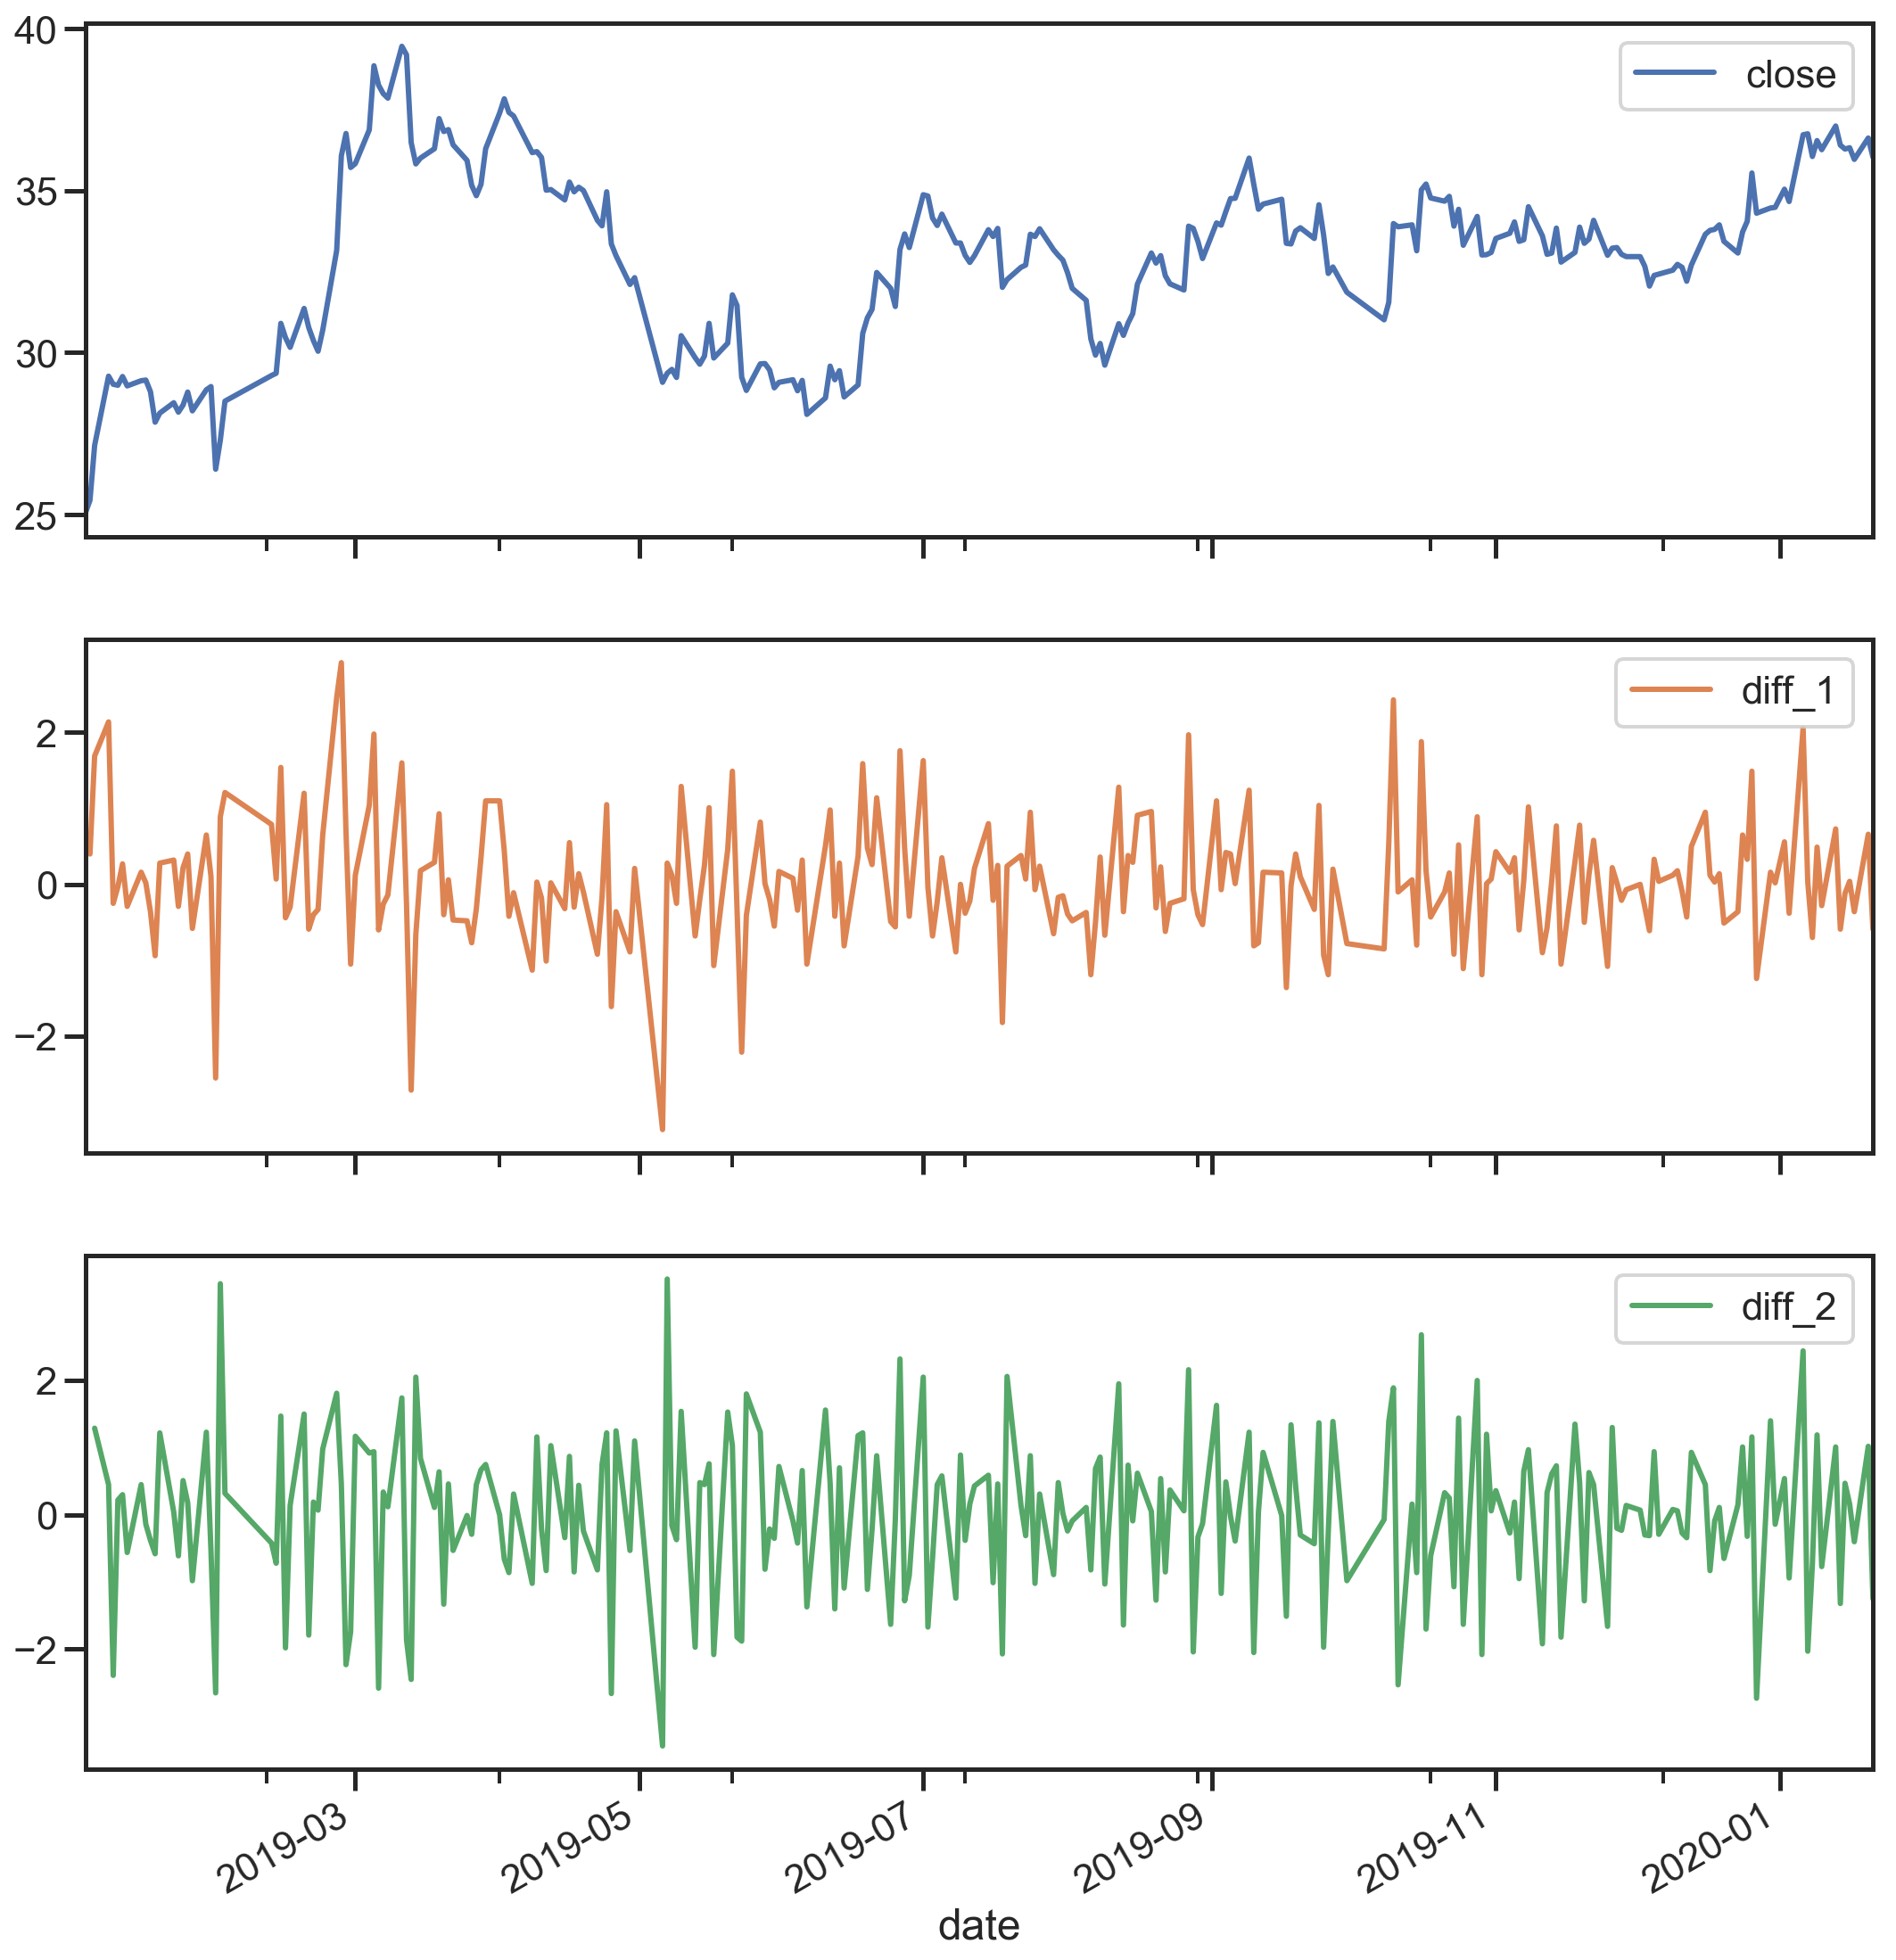

In [23]:
plot_diff(kdxf)

In [24]:
def acf_plot(df):
    sns.set(style='ticks', context='poster')
    fig = plt.figure(figsize=(12,8))

    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df, lags=20,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    # Partial Autocorrelation of closing price of kdxf stocks

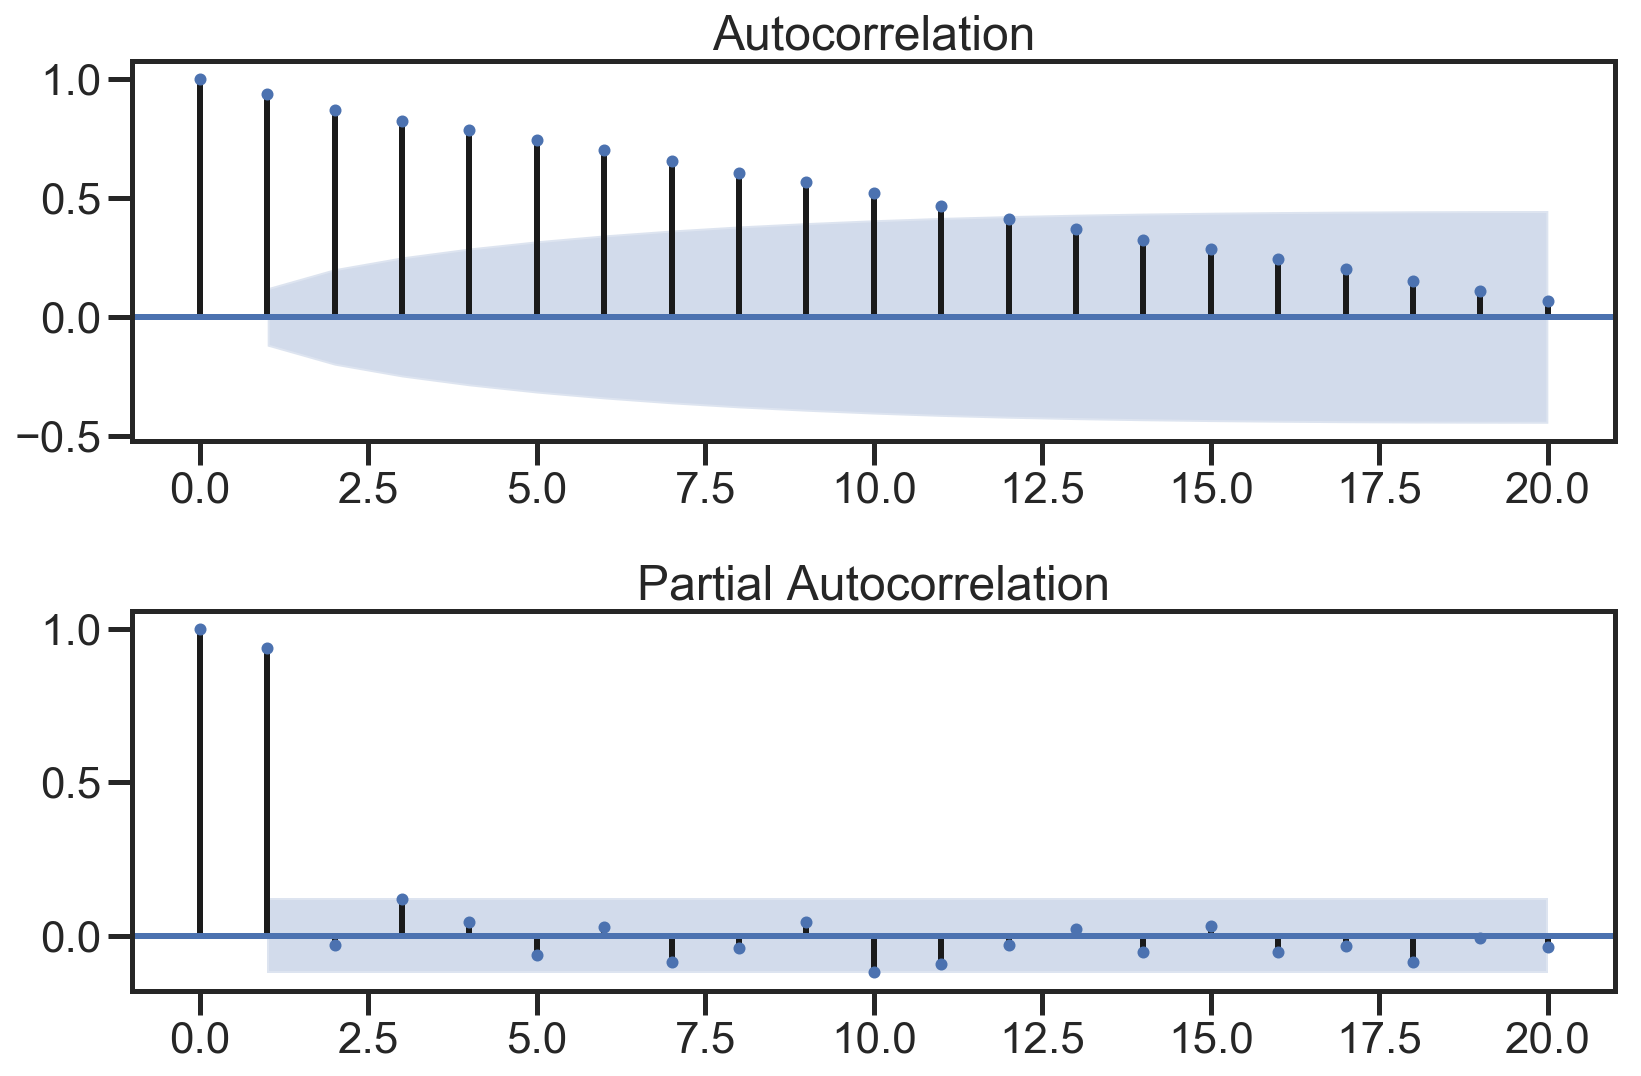

In [25]:
acf_plot(kdxf[['close']])

In [26]:
# Êï£ÁÇπÂõæ‰πüÂèØ‰ª•Ë°®Á§∫
def scater_stplt(df):
    lags=9

    ncols=3
    nrows=int(np.ceil(lags/ncols))
    sns.set(style='ticks', context='poster')
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

    kdxf_close = df[['close']]
#     kdxf_close['diff_1'] = kdxf_close['close'].diff(1)
#     kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)
    for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
        lag_str = 't-{}'.format(lag)
        X = (pd.concat([kdxf_close, kdxf_close.shift(-lag)], axis=1,
                       keys=['y'] + [lag_str]).dropna())

        X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
        corr = X.corr().as_matrix()[0][1]
        ax.set_ylabel('Original')
        ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
        ax.set_aspect('equal');
        sns.despine();

    fig.tight_layout();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

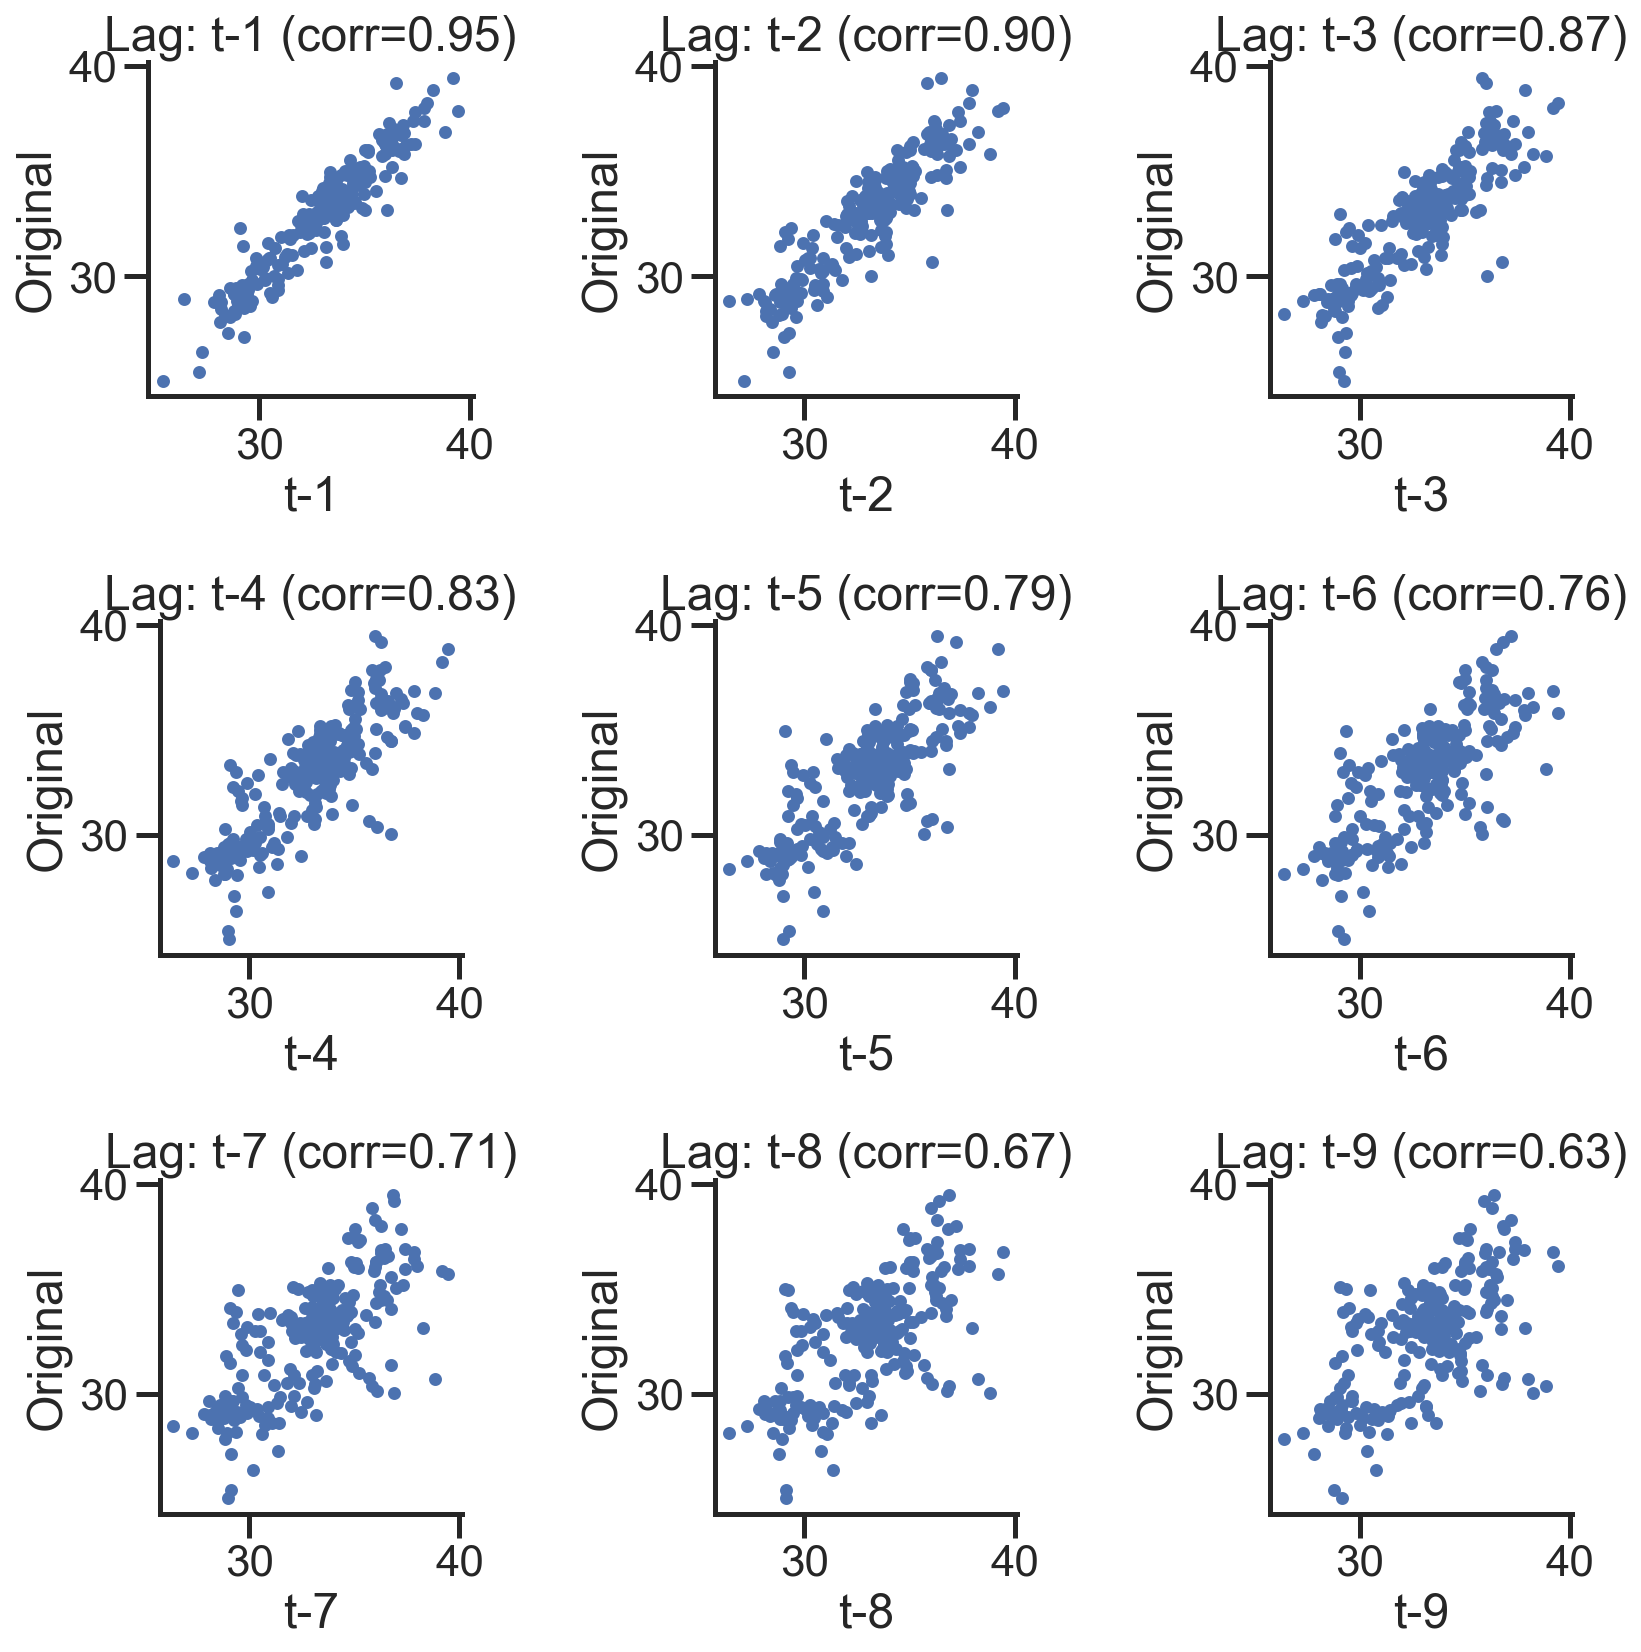

In [27]:
scater_stplt(kdxf)

### ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)<br>

$y_t = a_1y_{t-1} + œµ_t$

ARIMA(1,0,1)<br>
$y_t = a_1y_{t-1} + œµ_t + b_1œµ_{t-1}$

ARIMA(1,1,1)<br>
$Œîy_t = a_1Œîy_{t-1} + œµ_t + b_1œµ_{t-1}$  <br>where $Œîy_t = y_t - y_{t-1}$

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  256
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -374.574
Method:                       css-mle   S.D. of innovations              1.045
Date:                Thu, 02 Apr 2020   AIC                            755.147
Time:                        19:54:55   BIC                            765.783
Sample:                             1   HQIC                           759.425
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.045     -0.087      0.931      -0.093       0.085
ar.L1.D.y     -0.4462      0.056     -7.963      0.000      -0.556      -0.336
                                    Roots           

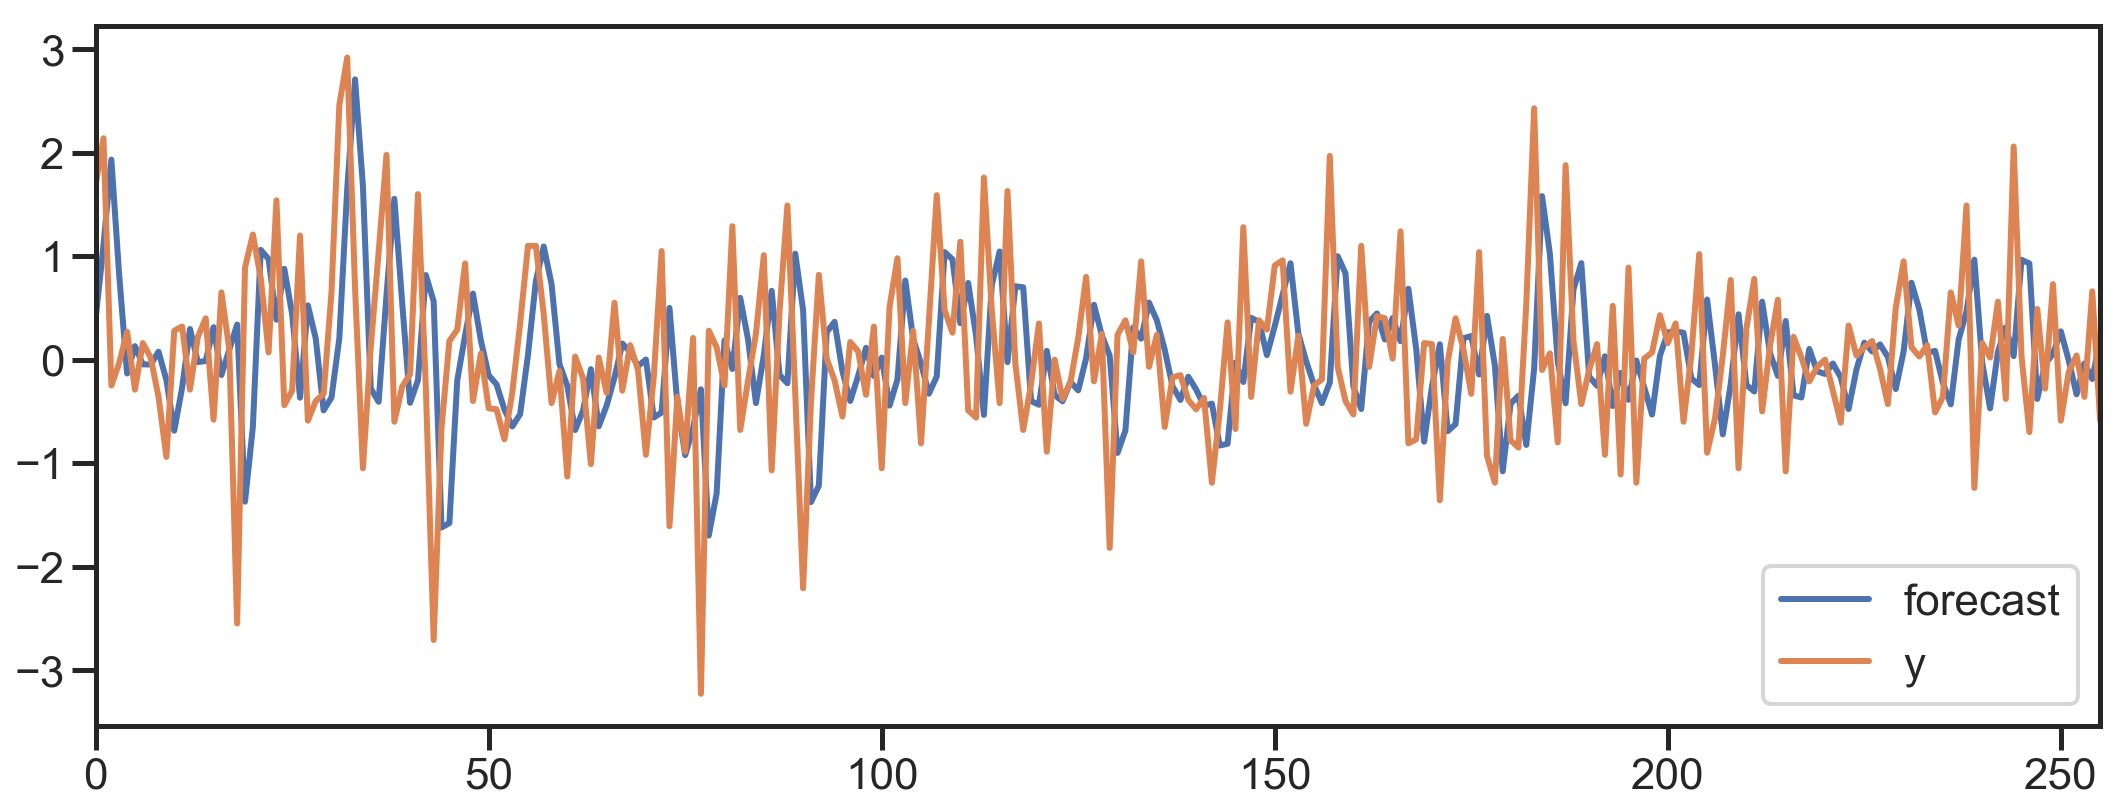

In [181]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(kdxf["close"].diff().iloc[1:].values, order=(1,1,0))
result = model.fit()
print(result.summary())
# result.plot_predict(start=700, end=1000)
result.plot_predict()
plt.show()

### Process Comments Data

In [33]:
path ='/Users/cheriehe/Desktop/Thesis/data/WeiboSuperSpider/topic/'
dates=['20190101-20190103', '20190104-20190106','20190107-20190109','20190110-20190110',
       '20190111-20190111','20190112-20190113','20190114-20190115','20190116-20190117',
       '20190118-20190119','20190120-20190121','20190122-20190123','20190123-20190124',
       '20190125-20190126','20190127-20190129','20190130-20190131','20190201-20190203',
      '20190204-20190207','20190208-20190211','20190212-20190214','20190215-20190217','20190218-20190224',
      '20190226-20190226','20190227-20190227','20190228-20190228','20190303-20190305','20190303-20190305',
      '20190306-20190307','20190308-20190314','20190315-20190316','20190317-20190318','20190319-20190320',
      '20190321-20190322','20190323-20190324','20190325-20190326','20190327-20190328','20190329-20190330',
      '20190331-20190401','20190402-20190404','20190405-20190408','20190409-20190411','20190412-20190414',
      '20190415-20190417','20190418-20190420','20190421-20190423','20190424-20190426','20190427-20190430',
      '20190501-20190505','20190506-20190508','20190509-20190511','20190512-20190514','20190515-20190517',
      '20190518-20190520','20190521-20190521','20190522-20190522','20190523-20190523','20190524-20190525',
      '20190526-20190527','20190528-20190528', '20190529-20190531','20190601-20190604','20190605-20190607',
      '20190608-20190610','20190611-20190613','20190614-20190616','20190616-20190618','20190619-20190619',
      '20190620-20190621','20190622-20190625','20190626-20190628','20190629-20190630','20190701-20190703',
      '20190704-20190706','20190707-20190709','20190710-20190712','20190713-20190717','20190718-20190720',
      '20190721-20190725','20190726-20190731','20190801-20190803','20190807-20190809','20190810-20190812',
      '20190813-20190817','20190818-20190820','20190821-20190823','20190824-20190827','20190828-20190831',
      '20190901-20190903','20190904-20190906','20190907-20190912','20190913-20190918','20190917-20190919',
      '20190919-20190923','20190924-20190928','20190929-20190930','20191001-20191007','20191008-20191008',
      '20191009-20191009', '20191010-20191010','20191011-20191013','20191014-20191016','20191017-20191019',
      '20191020-20191022','20191023-20191024','20191025-20191026','20191027-20191027','20191028-20191031',
      '20191101-20191103','20191104-20191105','20191106-20191108','20191109-20191111','20191112-20191114',
      '20191115-20191119','20191120-20191122','20191123-20191126','20191127-20191130','20191201-20191205',
       '20191205-20191210','20191206-20191210','20191211-20191215','20191216-20191218','20191219-20191221',
       '20191222-20191224','20191225-20191227','20191228-20191231','20200101-20200103','20200104-20200105',
      '20200105-20200106','20200107-20200107','20200108-20200109','20200110-20200121']
comms_total = pd.DataFrame()
for date in dates:
#     print(path+'ÁßëÂ§ßËÆØÈ£û'+date+'.csv')
    weibo_comms = pd.read_csv(f'{path}ÁßëÂ§ßËÆØÈ£û{date}.csv')
#     comms_total.append(weibo_comms)
    comms_total = comms_total.append([weibo_comms],ignore_index=True)

In [34]:
del comms_total['Unnamed: 10']
del comms_total['Unnamed: 11']

In [35]:
comms_total.head(3)

ÂéüÂßãÂõæÁâáurl ÂèëÂ∏É‰ΩçÁΩÆ                ÂèëÂ∏ÉÂ∑•ÂÖ∑              ÂèëÂ∏ÉÊó∂Èó¥         ÂèëÂ∏ÉËÄÖ       ÂæÆÂçöid  \
0       Êó†    Êó†           iPhoneÂÆ¢Êà∑Á´Ø  2019-01-02 11:30       Ê±üÊ∑Æ‰πòÁî®ËΩ¶  Ha3JVedku   
1       Êó†    Êó†        ÂæÆÂçö weibo.com  2019-01-03 23:39  janw-ongÊó∂‰ª£  HahWe7BgP   
2       Êó†    Êó†  HUAWEI nova 2 Plus  2019-01-03 23:21    aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç  HahP92pNt   

                                                ÂæÆÂçöÊ≠£Êñá ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö    ÁÇπËµûÊï∞  \
0  Ê±üÊ∑Æ‰πòÁî®ËΩ¶:#‰∏∫Ê¢¶ÊÉ≥TÈÄü#‰∏ÄËæÜDream car ÈúÄË¶Å‰ªÄ‰πàÔºüÊõ¥Â§ßÁöÑÁ©∫Èó¥ÔºüÊõ¥Âº∫ÁöÑÂä®ÂäõÔºüÊõ¥ÂÆâÂÖ®ÁöÑ...    True  10510   
1  janw-ongÊó∂‰ª£:#Ë¥¢Áªè# #Ë¥¢ÁªèËææ‰∫∫ËØ¥#8Êúà31Êó•ÔºåÁßëÂ§ßËÆØÈ£û(002230)Âú®ÊèêÂà∞ËøëÊúü...    True      0   
2  aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç:2019-01-03‰øùÈô©Èì∂Ë°åÂ¶ÇÊúüÂèçÂºπÔºåÂà∏ÂïÜÂ§ßÈ£ûÊú∫È¢ÜÊ∂®Ëà™Â§©ÈÄö‰ø°Á´û‰ª∑8ÔºÖÁõ¥Êé•Â∏¶...    True      0   

  Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl  ËØÑËÆ∫Êï∞   ËΩ¨ÂèëÊï∞  
0            Êó†  695  5492  
1            Êó†    0     0  
2            Êó†    0     0

In [36]:
comms_total.count()

ÂéüÂßãÂõæÁâáurl         24742
ÂèëÂ∏É‰ΩçÁΩÆ            24742
ÂèëÂ∏ÉÂ∑•ÂÖ∑            24741
ÂèëÂ∏ÉÊó∂Èó¥            24742
ÂèëÂ∏ÉËÄÖ             24742
ÂæÆÂçöid            24742
ÂæÆÂçöÊ≠£Êñá            24742
ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö         23680
ÁÇπËµûÊï∞             24742
Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl    23680
ËØÑËÆ∫Êï∞             24742
ËΩ¨ÂèëÊï∞             24742
dtype: int64

In [110]:
comms_total.drop_duplicates(keep='last', inplace=True)

In [38]:
comms_total.count()

ÂéüÂßãÂõæÁâáurl         21015
ÂèëÂ∏É‰ΩçÁΩÆ            21015
ÂèëÂ∏ÉÂ∑•ÂÖ∑            21014
ÂèëÂ∏ÉÊó∂Èó¥            21015
ÂèëÂ∏ÉËÄÖ             21015
ÂæÆÂçöid            21015
ÂæÆÂçöÊ≠£Êñá            21015
ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö         20077
ÁÇπËµûÊï∞             21015
Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl    20077
ËØÑËÆ∫Êï∞             21015
ËΩ¨ÂèëÊï∞             21015
dtype: int64

In [39]:
comms_total.tail(2)

ÂéüÂßãÂõæÁâáurl ÂèëÂ∏É‰ΩçÁΩÆ            ÂèëÂ∏ÉÂ∑•ÂÖ∑              ÂèëÂ∏ÉÊó∂Èó¥   ÂèëÂ∏ÉËÄÖ       ÂæÆÂçöid  \
24740       Êó†    Êó†       iPhoneÂÆ¢Êà∑Á´Ø  2020-01-13 22:13  È£ûÈπ§Âáå‰∫ë  IplbvtB1L   
24741       Êó†    Êó†  HUAWEI P20 Pro  2020-01-13 22:11  ÁªÉÂΩ©‰∫∫Áîü  Iplaw1bUs   

                                                    ÂæÆÂçöÊ≠£Êñá ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö ÁÇπËµûÊï∞  \
24740  ËΩ¨ÂèëÁêÜÁî±://@ÁªµÂ∑û‰∏ÄÂì•:ÊàëÁúãÂ•ΩÁßëÂ§ßËÆØÈ£û„ÄÇ¬†¬†\nÂéüÂßãÁî®Êà∑: ‰∏≠Ê¨ßËãπÊûú\nËΩ¨ÂèëÂÜÖÂÆπ: ÈîÇÁîµÊ±†...   False   0   
24741  ËΩ¨ÂèëÁêÜÁî±:ËΩ¨ÂèëÂæÆÂçö¬†¬†\nÂéüÂßãÁî®Êà∑: Ê¢¶ÊÉ≥ÂÆ∂ÊûóÂ•á\nËΩ¨ÂèëÂÜÖÂÆπ: #ÁßíÊãçËßÜÈ¢ë#ÊàëÂàÜ‰∫´‰∫Ü ËÄÅÊùøËÅî...   False   0   

      Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl ËØÑËÆ∫Êï∞ ËΩ¨ÂèëÊï∞  
24740            Êó†   0   0  
24741            Êó†   0   0

In [40]:
# df.drop(df.index[2])
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÂ∑•ÂÖ∑']=="Â≠¶‰π†Âº∫ÂõΩÂÆ¢Êà∑Á´Ø"].index.tolist())

In [41]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÂ∑•ÂÖ∑']=="‰ªÄ‰πàÂÄºÂæó‰π∞app"].index.tolist())

In [42]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÂ∑•ÂÖ∑']=="‰π∞‰∏™‰æøÂÆúË¥ß"].index.tolist())

In [43]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ËÇ°Â∏ÇIÈªëÈ©¨‰∫ëÂì•'].index.tolist())

In [44]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ËÇ°ËóèÂπ≤Ë¥ßI'].index.tolist())

In [45]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Áî®Êà∑6890661058'].index.tolist())

In [46]:
comms_total=comms_total.drop(comms_total[comms_total['ÂæÆÂçöÊ≠£Êñá']=='ËΩ¨ÂèëÂæÆÂçöÂ∑≤Ë¢´Âà†Èô§'].index.tolist())

In [47]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='tÈáëËøêÊâ£Êâ£'].index.tolist())

In [48]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÂëΩ‰∏éÊ±†È±º'].index.tolist())

In [49]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Êú¨Âú∞ËÉñÂì•ÁöÑÂæÆÂçö'].index.tolist())

In [50]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Êà¥ÁúºÈïúÁöÑÂ∞èÊµ£ÁÜä'].index.tolist())

In [51]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Âåó‰∫¨-‰º†Â™íÊúçÂä°‰∏≠ÂøÉ'].index.tolist())

In [52]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÈòøÂΩ™ÂàÜÊûê'].index.tolist())

In [53]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Â§ßÂèØÁà±ÁöÑ‰∏ìÂ±ûÈ•≤ÂÖªÂëò'].index.tolist())

In [54]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÈÖ∑ÁõñDV'].index.tolist())

In [55]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÂêëÊó•Ëëµde‰ø°Âøµ‰∏∂'].index.tolist())

In [56]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Êù®Ë∂ÖÂàÜÊûê'].index.tolist())

In [57]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÂòâÈæôÂàÜÊûê'].index.tolist())

In [58]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='ÁãºÂì•ÊúâËØùËØ¥'].index.tolist())

In [59]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Â§ßÂà´ÈíàÈíàÈíà'].index.tolist())

In [60]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Â£πÊîØÂ∞è‰ªôÂ•≥'].index.tolist())

In [61]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='È£ûÊù®ÁúãÁõò'].index.tolist())

In [62]:
comms_total.count()

ÂéüÂßãÂõæÁâáurl         19804
ÂèëÂ∏É‰ΩçÁΩÆ            19804
ÂèëÂ∏ÉÂ∑•ÂÖ∑            19803
ÂèëÂ∏ÉÊó∂Èó¥            19804
ÂèëÂ∏ÉËÄÖ             19804
ÂæÆÂçöid            19804
ÂæÆÂçöÊ≠£Êñá            19804
ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö         18879
ÁÇπËµûÊï∞             19804
Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl    18879
ËØÑËÆ∫Êï∞             19804
ËΩ¨ÂèëÊï∞             19804
dtype: int64

In [63]:
# comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Áî®Êà∑7051835203'].index.tolist())

In [64]:
# comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=='Áî®Êà∑7051835203'].index.tolist())

In [65]:
comms_total['ÂæÆÂçöÊ≠£Êñá'].drop_duplicates(keep='last', inplace=True)

In [66]:
np.size(comms_total['ÂæÆÂçöÊ≠£Êñá'].unique())

17947

In [67]:
comms_total.head()

ÂéüÂßãÂõæÁâáurl ÂèëÂ∏É‰ΩçÁΩÆ                ÂèëÂ∏ÉÂ∑•ÂÖ∑              ÂèëÂ∏ÉÊó∂Èó¥           ÂèëÂ∏ÉËÄÖ       ÂæÆÂçöid  \
1       Êó†    Êó†        ÂæÆÂçö weibo.com  2019-01-03 23:39    janw-ongÊó∂‰ª£  HahWe7BgP   
2       Êó†    Êó†  HUAWEI nova 2 Plus  2019-01-03 23:21      aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç  HahP92pNt   
3       Êó†    Êó†               UCÊµèËßàÂô®  2019-01-03 22:27       ËøôÂ∞±ÊòØÂêçÂ≠ó18  Haht6kPHh   
4       Êó†    Êó†           iPhoneÂÆ¢Êà∑Á´Ø  2019-01-03 20:58  AlwaysOlineÂáØ  HagTc7lk5   
5       Êó†    Êó†            360ÂÆâÂÖ®ÊµèËßàÂô®  2019-01-03 20:29          ÈÄÜÈ£éÁåéÁÅ´  HagHhnQX6   

                                                ÂæÆÂçöÊ≠£Êñá ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö ÁÇπËµûÊï∞ Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl  \
1  janw-ongÊó∂‰ª£:#Ë¥¢Áªè# #Ë¥¢ÁªèËææ‰∫∫ËØ¥#8Êúà31Êó•ÔºåÁßëÂ§ßËÆØÈ£û(002230)Âú®ÊèêÂà∞ËøëÊúü...    True   0            Êó†   
2  aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç:2019-01-03‰øùÈô©Èì∂Ë°åÂ¶ÇÊúüÂèçÂºπÔºåÂà∏ÂïÜÂ§ßÈ£ûÊú∫È¢ÜÊ∂®Ëà™Â§©ÈÄö‰ø°Á´û‰ª∑8ÔºÖÁõ¥Êé•Â∏¶...    True   0            Êó†   
3  ËøôÂ∞±ÊòØÂêçÂ≠ó18:Êí≠ÂÆ¢ ÂæàÁÆÄÂçïÁöÑ‰∏úË•øÔºåÊØî‰∏ÄËà¨Âà´‰∫∫ÊÄé‰πàÂÅöÁöÑÂ•Ω‰∏ÄÁÇπÔºå‰∫ÆÁÇπÔºåÁ±ª‰ººÂ§çÂà© resourc...    True   0            Êó†   
4       AlwaysOlineÂáØ:ÊÑüÂèó‰∏ã‰∫∫Â∑•Êô∫ËÉΩÔºåÁßëÂ§ßËÆØÈ£ûÂà∂ÈÄ† ‰πâ‰πå¬∑‰πâ‰∫≠Èïá ¬†ÊòæÁ§∫Âú∞Âõæ¬†ÂéüÂõæ¬†    True   0            Êó†   
5  ÈÄÜÈ£éÁåéÁÅ´:Êú¨Êó•Ê≤™ÊåáÁï•Â¢ûÈáèÂçÅÂ≠óÊòüÔºå‰∏äÂΩ±„ÄÇÂàõ‰∏öÊùøÊîæÈáèÈ°∂5Êó•Á∫øÂéãÂäõÂõûÊí§Ôºå‰∏äÂΩ±„ÄÇÊó•Á∫øÂΩ¢ÊÄÅ‰∏çÁæé„ÄÇÂàõ‰∏öÊùø...    True   0            Êó†   

  ËØÑËÆ∫Êï∞ ËΩ¨ÂèëÊï∞  
1   0   0  
2   0   0  
3   0   0  
4   1   0  
5   0   0

In [68]:
comms_total.isnull().any()

ÂéüÂßãÂõæÁâáurl         False
ÂèëÂ∏É‰ΩçÁΩÆ            False
ÂèëÂ∏ÉÂ∑•ÂÖ∑             True
ÂèëÂ∏ÉÊó∂Èó¥            False
ÂèëÂ∏ÉËÄÖ             False
ÂæÆÂçöid            False
ÂæÆÂçöÊ≠£Êñá            False
ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö          True
ÁÇπËµûÊï∞             False
Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl     True
ËØÑËÆ∫Êï∞             False
ËΩ¨ÂèëÊï∞             False
dtype: bool

In [69]:
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÊó∂Èó¥']=="ÂèëÂ∏ÉÊó∂Èó¥"].index.tolist())
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÊó∂Èó¥']=='ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö'].index.tolist())
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÊó∂Èó¥']== 'TRUE'].index.tolist())
comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÊó∂Èó¥']=='FALSE'].index.tolist())

## convert all dates to the same format *%Y-%m-%d*

In [70]:
wb_dates=[]
for dats in comms_total['ÂèëÂ∏ÉÊó∂Èó¥'].values.tolist():
    try:
        wb_dates.append(datetime.strftime(datetime.strptime(dats, '%Y-%m-%d %H:%M').date(),'%Y-%m-%d'))
    except:
        wb_dates.append(datetime.strftime(datetime.strptime(dats, '%m/%d/%y %H:%M').date(),'%Y-%m-%d'))

In [71]:
comms_total['ÂèëÂ∏ÉÊó∂Èó¥'] = wb_dates
del comms_total['ÂéüÂßãÂõæÁâáurl']
del comms_total['ÂèëÂ∏É‰ΩçÁΩÆ']
del comms_total['ÂèëÂ∏ÉÂ∑•ÂÖ∑']
del comms_total['ÂæÆÂçöid']
del comms_total['Ë¢´ËΩ¨ÂèëÂæÆÂçöÂéüÂßãÂõæÁâáurl']
comms_total.head()

ÂèëÂ∏ÉÊó∂Èó¥           ÂèëÂ∏ÉËÄÖ  \
1  2019-01-03    janw-ongÊó∂‰ª£   
2  2019-01-03      aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç   
3  2019-01-03       ËøôÂ∞±ÊòØÂêçÂ≠ó18   
4  2019-01-03  AlwaysOlineÂáØ   
5  2019-01-03          ÈÄÜÈ£éÁåéÁÅ´   

                                                ÂæÆÂçöÊ≠£Êñá ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö ÁÇπËµûÊï∞ ËØÑËÆ∫Êï∞ ËΩ¨ÂèëÊï∞  
1  janw-ongÊó∂‰ª£:#Ë¥¢Áªè# #Ë¥¢ÁªèËææ‰∫∫ËØ¥#8Êúà31Êó•ÔºåÁßëÂ§ßËÆØÈ£û(002230)Âú®ÊèêÂà∞ËøëÊúü...    True   0   0   0  
2  aÈÄÄÊ≠•ÂéüÊù•ÊòØÂêëÂâç:2019-01-03‰øùÈô©Èì∂Ë°åÂ¶ÇÊúüÂèçÂºπÔºåÂà∏ÂïÜÂ§ßÈ£ûÊú∫È¢ÜÊ∂®Ëà™Â§©ÈÄö‰ø°Á´û‰ª∑8ÔºÖÁõ¥Êé•Â∏¶...    True   0   0   0  
3  ËøôÂ∞±ÊòØÂêçÂ≠ó18:Êí≠ÂÆ¢ ÂæàÁÆÄÂçïÁöÑ‰∏úË•øÔºåÊØî‰∏ÄËà¨Âà´‰∫∫ÊÄé‰πàÂÅöÁöÑÂ•Ω‰∏ÄÁÇπÔºå‰∫ÆÁÇπÔºåÁ±ª‰ººÂ§çÂà© resourc...    True   0   0   0  
4       AlwaysOlineÂáØ:ÊÑüÂèó‰∏ã‰∫∫Â∑•Êô∫ËÉΩÔºåÁßëÂ§ßËÆØÈ£ûÂà∂ÈÄ† ‰πâ‰πå¬∑‰πâ‰∫≠Èïá ¬†ÊòæÁ§∫Âú∞Âõæ¬†ÂéüÂõæ¬†    True   0   1   0  
5  ÈÄÜÈ£éÁåéÁÅ´:Êú¨Êó•Ê≤™ÊåáÁï•Â¢ûÈáèÂçÅÂ≠óÊòüÔºå‰∏äÂΩ±„ÄÇÂàõ‰∏öÊùøÊîæÈáèÈ°∂5Êó•Á∫øÂéãÂäõÂõûÊí§Ôºå‰∏äÂΩ±„ÄÇÊó•Á∫øÂΩ¢ÊÄÅ‰∏çÁæé„ÄÇÂàõ‰∏öÊùø...    True   0   0   0

In [72]:
comms_total.count()

ÂèëÂ∏ÉÊó∂Èó¥       19731
ÂèëÂ∏ÉËÄÖ        19731
ÂæÆÂçöÊ≠£Êñá       19731
ÊòØÂê¶‰∏∫ÂéüÂàõÂæÆÂçö    18878
ÁÇπËµûÊï∞        19731
ËØÑËÆ∫Êï∞        19731
ËΩ¨ÂèëÊï∞        19731
dtype: int64

In [73]:
comms_total.columns = ['date', 'usr','content', 'if_ori','thumbups', 'comments_num ','numretweets']

In [74]:
# pd.set_option('display.max_rows', None)
usr_efct = comms_total[['usr', 'thumbups']].groupby('usr').count().sort_values('thumbups', ascending=False)

usr_efct['usr']=usr_efct.index
usr_efct.index=range(len(usr_efct))
usr_efct.columns=['usr_thumups', 'usr']
usr_efct.head()

usr_thumups           usr
0          177          ÁßëÂ§ßËÆØÈ£û
1          143  ÁßëÂ§ßËÆØÈ£ûsz002230
2          125         Â∞èË¥¢‰∏ª‰∫îÈáë
3           93          ‰∏≠Ê¨ßËãπÊûú
4           89        Ê∑òÈáëËÄÖ-ÊìíÁâõ

In [75]:
comms_total=comms_total.sort_values('date', ascending=True)
comms_total.index=range(1,len(comms_total)+1)
comms_total=pd.merge(comms_total, usr_efct, how='left', on='usr') 
comms_total.head()

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   
3  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   
4  2019-01-01        Â∏ÖÂßêWendy   

                                             content if_ori thumbups  \
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...   True        0   
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...  False        0   
2  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†...   True        2   
3  ËΩ¨ÂèëÁêÜÁî±:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®...  False        0   
4  Â∏ÖÂßêWendy:Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢...   True        0   

  comments_num  numretweets  usr_thumups  
0             0           0           39  
1             1          37           14  
2             2           0            2  
3             0           0            2  
4             0           0            6

In [76]:
comms_total['propn'] = np.size(comms_total['usr'].unique())*comms_total['usr_thumups']/comms_total['usr_thumups'].sum()
comms_total.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori thumbups  \
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...   True        0   
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...  False        0   
2  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†...   True        2   

  comments_num  numretweets  usr_thumups     propn  
0             0           0           39  2.299559  
1             1          37           14  0.825483  
2             2           0            2  0.117926

In [77]:
comms_total['if_ori'][comms_total['if_ori']==True]=np.ones(len(comms_total[comms_total['if_ori']==True]))
comms_total['if_ori'][comms_total['if_ori']==False]=np.zeros(len(comms_total[comms_total['if_ori']==False]))
comms_total.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori thumbups  \
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...      1        0   
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...      0        0   
2  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†...      1        2   

  comments_num  numretweets  usr_thumups     propn  
0             0           0           39  2.299559  
1             1          37           14  0.825483  
2             2           0            2  0.117926

In [78]:
del comms_total['usr_thumups']
comms_total.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori thumbups  \
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...      1        0   
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...      0        0   
2  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†...      1        2   

  comments_num  numretweets     propn  
0             0           0  2.299559  
1             1          37  0.825483  
2             2           0  0.117926

In [79]:
comms_total['date']=[dates.split(' ')[0] for dates in comms_total['date'].tolist()]
comms_total.sample(5)

date       usr  \
6340   2019-05-15   ÂøÉÈùôÂ¶ÇÊ∞¥-‰∏äÊµ∑   
2197   2019-02-14     Âê¥ÂõΩÂπ≥Ë¥¢Áªè   
2736   2019-02-26  Â∞èÂ∞èÊ£ÆÊûó1998   
15454  2019-10-29   honstec   
8493   2019-06-18      Êó†ÂøåËÆ∫Â∏Ç   

                                                 content if_ori thumbups  \
6340   ÂøÉÈùôÂ¶ÇÊ∞¥-‰∏äÊµ∑:ÊàëÁöÑÁôΩÈ©¨ËìùÁ≠πËÇ°ËÇ°Ê±†Â¶Ç‰∏ãÔºö1„ÄÅÈáëËûçËÇ°Ôºö‰∏≠ÂõΩÂπ≥ÂÆâ„ÄÅÊãõÂïÜÈì∂Ë°å„ÄÅ‰∏≠‰ø°ËØÅÂà∏2„ÄÅÁôΩÈÖíÊ∂àË¥π...      1       13   
2197   Âê¥ÂõΩÂπ≥Ë¥¢Áªè:ËØ¥Âà∞‰∏úÊñπÈÄö‰ø°ÔºåËøôÊòØÊàë‰ª¨‰πãÂâçÈò∂ÊÆµÊÄßÊåñÊéòÂá∫Êù•ÁöÑ‰∏Ä‰∏™ÈæôÂ§¥ÂìÅÁßçÔºåÊàëÁõ∏‰ø°‰πãÂâçÁúãËøáÊàëÂ§ßÊñáÁ´†ÁöÑ...    NaN        3   
2736   Â∞èÂ∞èÊ£ÆÊûó1998:ÁÆÄÂçïÂõûÈ°æ‰ªäÂ§©Áõò‰∏≠ÊØîËæÉÁ≤æÂΩ©ÔºåÂ§ßÂ§öÊï∞È´ò‰ΩçËÇ°‰∏é‰∏úÊñπÂ§ßÁà∑Ëç£Ëæ±‰∏éÂÖ±Ôºå‰∏úÊñπÈÄö‰ø°Âá†Ê¨°ÂàÜÊ≠ß...      1        4   
15454  honstec:ÁõòÈù¢ÁúãÔºåÂ•∂Ôºà‰ºäÂà©ÔºâÂíåÈÖíÔºà‰∫îÁ≤ÆÊ∂≤ÔºâÂíåÊèêÂà∞ËøáÁöÑÈ£üÂìÅÔºà‰∏≠ÁÇ¨È´òÊñ∞ÔºâÁ®≥ÔºÅÁßëÂ§ßËÆØÈ£ûÊúÄÂ•ΩÁöÑ...   True        1   
8493   Êó†ÂøåËÆ∫Â∏Ç:‰ªäÂ§©Âπ≥Ê∑°‰∏îÊó†ËÅäÁöÑ‰∏ÄÂ§©ÁªìÊùü‰∫ÜÔºå‰πãÂâçÊãøËøáÁöÑÁ•®‰πüÈÉΩÊ∏Ö‰∫Ü„ÄÇËøëÊúüÊìç‰Ωú‰∏çÊòØÂ§™È°∫Âà©Ôºå‰∏ÄÂÖ±Êìç‰Ωú‰∫Ü‰∏â...   True      133   

      comments_num  numretweets     propn  
6340              3           9  0.058963  
2197              0           0  0.117926  
2736              0           0  0.058963  
15454             0           6  0.707557  
8493             20           0  0.294815

In [80]:
comms_total.count()[0]

19731

In [81]:
# comms_total[comms_total['usr']=='yushui55']
comms_total['content'].iloc[0].split(":")[0]

'ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•'

In [82]:
comms_total=comms_total.drop(comms_total[comms_total['content']==0].index.tolist())

In [83]:
# comms_total[comms_total['ÂèëÂ∏ÉËÄÖ']=="ÊàëÊòØÁßçËçâÂõ§Ë¥ßÈÖ±"]['ÂæÆÂçöÊ≠£Êñá'].values[0].split(':')[1]=='Â§©Âñµ618ÔºàË∂ÖÁ∫ßÁ∫¢ËãûÂÖ•Âè£ÔºâÔºö http'
# get rig of advertisements users
nali = ["ÊàëÊòØÁßçËçâÂõ§Ë¥ßÈÖ±",'ÊãçÂèã2641597165', 'ÊúàÊòéÊòüÁ®ÄÊô¥','Áî∑Ë£ÖÊΩÆÊµÅÁ©øÊê≠','Â£πÊîØÂ∞è‰ªôÂ•≥','tÈáëËøêÊâ£Êâ£']
block_names = []
for coms in comms_total['content']:
    for name in nali:
        try:
            if (coms.split(':')[1]==comms_total[comms_total['usr']==name]['content'].values[0].split(":")[1]):
                block_names.append(coms.split(':')[0])
                print(coms.split(':')[0])
        except:
            pass
#             print(coms)

Áî®Êà∑6694956734
‰∫∫ÁîüËã•Âè™Â¶ÇÂàùËßÅy_
Ë∞ÅÁöÑÂπ∏Á¶èrebecca
Áï™ËåÑÁÉßÈ∏°Ëõã
ÁôΩÊ¥õÈ¶®
sure-ing
Áî®Êà∑7011490871
Ëø∑‰∫∫ÁöÑÊó†ÂèØÊïëËçØ
Áî®Êà∑6450488341
fzhs
Êú®ÂÖ¨Â≠ê1573
Áî®Êà∑288nqzibqa
Ê≤°‰∫∫ËÉΩÂú®ÊàëÁöÑIDÈáåÊàòËÉúÊàë
Â∏ÉË¢ãÂ∞èÁÜä521
Áî®Êà∑5638395353
Â∞èÁæäÁæäÁà±ÂêÉËÇâÂòüÂòü
ËñõÁê¥1314520
ÊûóÂØíÈÄü
Âç¢È≤àÈ±ºLU
‰∏ÉÁéãÊòü53880
miao--Ê∂µ
ZzzÁÅ´Ë±Ü
‰æùÁºòÂ∞è‰∏∏Â≠ê
AMYHUANGTIAN
ÁîüÂëΩÊòØ‰∏™ÂπªË±°
ÈôàËæâ201905
ÂÅΩÂ™Ñ‰∏ª‰πâ
Âø´‰πêÁöÑÂúüÊ†πLd
Â∞èÈªë805
Ëæ£Ëæ£ÁöÑzy
ÊØèÂ§©ÈÉΩÂú®ÂÅöÊó©È§ê
Â±±‰∏úÂ§ßÂçöÂ±±
ÂòªÂòªÂòªÂòªÂòøÂòøÂòøÂòøÂòø
Èò≥ÂÖâÊµ∑Êµ™ÈáëÊ≤ôÊª©
Tgydwhn
ÈöèÈÅáÂÑø6494062771
ÁáïÂ∞îÈúèÈúè
jamensÊùé
Ë∑∑Ë∑∑Êùø0532
ÂãáÂæÄÁõ¥Ââç79163
ÁæΩÁóïiced
melonway
Áî®Êà∑6599938489
Áà±‰∫∫ÊòØÁå´ÂÑø
ÂúüË±Ü3921880290
KeEpconFUseD
ÁêÉÁêÉ-Á≥äÊ∂Ç
ÊùúÂ±±ÂÆó
ÊôèËá™ÊÇ†0837
Ê¢µÂê¨Á´πÈü≥0
ÁáïÂ±±Êúà2
ÊãçÂèã2641597165
ÊúàÊòéÊòüÁ®ÄÊô¥
‰æù‰æù608
ÂìüÂñîÂñîÂôú
‰ºäÁßãËñáËñá
ÂåÜÂåÜÈÇ£Âπ¥_198412
ÂÖ∂ÂÆûÊàëÂè´Èü©xixi
lnÈùôÊ∞¥ÊµÅÊ∑±
Âõ§Âõ§3038694161
ÈÜíÁõÆÂ∞èÁôΩ
ÁôΩËèúÊâãÂÜå
happy-ÊïÖ‰∫ã
Áî∑Ë£ÖÊΩÆÊµÅÁ©øÊê≠
Áî∑Â£´ÈÖçÊê≠ÊåáÂçó
Ê

In [87]:
len(block_names)

211

In [88]:
for name in block_names:
    comms_total=comms_total.drop(comms_total[comms_total['usr']==name].index.tolist())

comms_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19520 entries, 0 to 19730
Data columns (total 8 columns):
date             19520 non-null object
usr              19520 non-null object
content          19520 non-null object
if_ori           18667 non-null object
thumbups         19520 non-null object
comments_num     19520 non-null object
numretweets      19520 non-null object
propn            19520 non-null float64
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [89]:
comms_total.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori thumbups  \
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...      1        0   
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...      0        0   
2  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†...      1        2   

  comments_num  numretweets     propn  
0             0           0  2.299559  
1             1          37  0.825483  
2             2           0  0.117926

In [94]:
c2=comms_total[['content', 'propn']]
c2['content'].iloc[2] = c2['content'].iloc[1].split(":")[1]
c2.head()

content     propn
0  ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•:ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩ...  2.299559
1  ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"...  0.825483
2                                             (1003)  0.117926
3  ËΩ¨ÂèëÁêÜÁî±:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®...  0.117926
4  Â∏ÖÂßêWendy:Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢...  0.353778

In [96]:
c2[c2['content']=='0']

Empty DataFrame
Columns: [content, propn]
Index: []

In [97]:
for i in range(len(comms_total['content'])):
    try:
        if len(comms_total['content'].iloc[i].split(":")) <= 2:
            comms_total['content'].iloc[i] = comms_total['content'].iloc[i].split(":")[1]
        elif len(comms_total['content'].iloc[i].split(":")) > 4:
            comms_total['content'].iloc[i] = comms_total['content'].iloc[i].split(":")[1]+comms_total['content'].iloc[i].split(":")[2]+comms_total['content'].iloc[i].split(":")[3]
        else:
            comms_total['content'].iloc[i] = comms_total['content'].iloc[i].split(":")[1]+comms_total['content'].iloc[i].split(":")[2]            
    except:
        print(comms_total['content'].iloc[i].split(':'))

['#Â∞èÊ†ëÊÑøÊúõÊ∏ÖÂçï# ÊÉ≥‰π∞ÔºåÁßëÂ§ßËÆØÈ£ûÁøªËØëÊú∫Ëé´ÊØîÊñØÊô∫ËÉΩÁøªËØëËÄ≥Êú∫Êô∫ËÉΩËØ≠Èü≥ËÄ≥Êú∫Â§öÂõΩËØ≠Ë®ÄÁøªËØëÁ•ûÂô® \xa0[ÁªÑÂõæÂÖ±4Âº†]\xa0ÂéüÂõæ\xa0']
['#Êñ∞Êµ™ÁúãÁÇπ# 618È¶ñÊó•ÊàòÊä•Âá∫ÁÇâÔºöÁßëÂ§ßËÆØÈ£ûÂìÅÁâåÈîÄÂîÆÈ¢ùÊéíË°åÊ¶úÂèåÂ§∫ÂÜ†618È¶ñÊó•ÊàòÊä•Âá∫ÁÇâÔºöÁßëÂ§ßËÆØÈ£ûÂìÅÁâåÈîÄÂîÆÈ¢ùÊéíË°åÊ¶úÂèåÂ§∫ÂÜ† \xa0']
['#Â∞èËõÆËÖ∞ÊíëËÖ∞ËÆ°Âàí# ‰ªäÂ§©ÁöÑÊ¥ªÂä®ÂúÜÊª°ÁªìÊùü„ÄÇÁßëÂ§ßËÆØÈ£ûÁöÑËë£‰∫ãÈïøÂàòÂ∫ÜÂ≥∞Ë∑üÊàëÊòØÂêåÈæÑ‰∫∫ÔºåÊàëÂ∑≤ÁªèÊòØ‰∏≠Âπ¥Â¶áÂ•≥‰∫ÜÔºå‰ªñËøòÊòØ‰∏ÄÂº†Â®ÉÂ®ÉËÑ∏„ÄÇ99Âπ¥ÈááËÆøÂàöÂàõÁ´ãÁöÑÁßëÂ§ßËÆØÈ£ûÊó∂ÔºåË∞Å‰πü‰∏çÁü•ÈÅì20Âπ¥ÂêéÁöÑÂèòÂåñ„ÄÇÁúãÁùÄ‰∏ÄÁ≤íÁßçÂ≠êÔºåÁ†¥ÂúüËÄåÂá∫ÔºåÊÖ¢ÊÖ¢ÂèëËäΩÔºåÊûùÂè∂ÁπÅËåÇÔºåÈ£éÈõ®‰∏≠Êå∫Á´ãÔºåÈò≥ÂÖâ‰∏ãÈïøÂ§ß„ÄÇÂçÉÁ£®‰∏áÂáªËøòÂùöÂä≤‰ªªÂ∞î‰∏úË•øÂçóÂåóÈ£é \xa0']
['#Â∞èËõÆËÖ∞ÊíëËÖ∞ËÆ°Âàí# ÂàöÊâçÊúâÁ≤â‰∏ùÈóÆÊ≤°ËµöÈí±ÔºåÂΩìÁÑ∂Ê≤°ËµöÈí±Ôºå‰∏§Êàê‰ªì‰ΩçÂ∞±    ‰∏Ä‰∏™ÁßëÂ§ßËÆØÈ£û   ‰∏∫‰ªÄ‰πàË¶ÅËµöÈí±Ôºü   ‰∏çÂ§ß‰∫èÂ∞±Ë°åÔºåÂ∞±ÂÉè‰∏ä‰∏ÄÊ¨°ÁöÑÂæ∑Êñ∞‰∫§ËøêÔºå‰∏ÄÊàêÔºåÂ§ßË∑åÔºåÂõûÂà∞ÊàêÊú¨Âå∫ÂüüÔºå‰πüÂçñÔºå‰πüÊ≤°ËµöÈí±Ôºå‰ΩÜÊòØ‰∏ç‰ºöÂØπ‰Ω†Ë¥¶Êà∑ÈÄ†ÊàêÂ

In [98]:
comms_total['content'].iloc[1].split(":")[1]+comms_total['content'].iloc[1].split(":")[2]

IndexError: list index out of range

In [111]:
# comms_total = comms_total.drop([3])
comms_total.head()

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   
4  2019-01-01        Â∏ÖÂßêWendy   
5  2019-01-01         Ê©ôËâ≤Â§™Èò≥CM   

                                             content if_ori thumbups  \
0  ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...      1        0   
1  (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...      0        0   
2  2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...      1        2   
4  Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢ÈòüÊïôËÇ≤ÂæÆÂïÜÂÖ®‰ΩìÊàê...      1        0   
5  ÁßëÂ§ßËÆØÈ£ûÁöÑÂèÆÂíöÊô∫ËÉΩËØ≠Èü≥Èü≥ÁÆ±ÂíåÂ§©Áå´Á≤æÁÅµÂêå‰ª∑‰ΩçÁöÑÊØîÔºåÈü≥Ë¥®ÈÉΩÂæàÊ∏£ÔºõÂ§©Áå´Á≤æÁÅµÂÜÖÂÆπ‰∏äÊØîÂèÆÂíöÂ§öÂæàÂ§öÔºõÊ≤üÈÄö...      1        0   

  comments_num  numretweets     propn  
0             0           0  2.299559  
1             1          37  0.825483  
2             2           0  0.117926  
4             0           0  0.353778  
5             1           0  0.058963

In [112]:
comms_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 0 to 19730
Data columns (total 8 columns):
date             19237 non-null object
usr              19237 non-null object
content          19237 non-null object
if_ori           18387 non-null object
thumbups         19237 non-null object
comments_num     19237 non-null object
numretweets      19237 non-null object
propn            19237 non-null float64
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [113]:
# comms_total.to_csv('weibo_comms.csv',index = False)

In [287]:
tweets_num =comms_total[['date', 'content']].groupby('date').count()
# .sort_values('content', ascending=False)
tweets_num.head()

content
date               
2019-01-01       10
2019-01-02       65
2019-01-03       58
2019-01-04       61
2019-01-05       40

In [288]:
tweets_num.tail(3)

content
date               
2020-01-19       39
2020-01-20       50
2020-01-21       52

In [289]:
del comms_total['usr']

<h2 style='color:coral'> Guba Comments Data Processing</h2>

In [10]:
def read_news_20(num):
    knews=pd.DataFrame()
    numls = 10*np.arange(num)[10:,]
    for num in numls:
        f_name = f'kdxf_news({num}, {num+10}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [11]:
def read_news(num):
    knews=pd.DataFrame()
    numls = 5*np.arange(num)[28:,]+np.ones(num-28, dtype=int)
    for num in numls:
        f_name = f'kdxf_news({num}, {num+4}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [12]:
k20=read_news_20(14)
k20.head()

title  \
0  ‰∏ÄÂ§ßÊó©ËÆ©ÊàëÁ©∫Âñú‰∏ÄÂú∫„ÄÇÂàöÂºÄÂßã‰ª•‰∏∫ÊòØ‰∏öÁª©È¢ÑÊä•ÂÖ¨ÂëäÔºåÂæàÈ´òÂÖ¥ÔºåÂøÉÊÉ≥Ëøô‰∏ãÂ≠êÁªà‰∫éÂÖëÁé∞‰∫ÜÔºÅÂÜçÂæÄ   
1                                     ‰∏≠Ê†áÈÉΩÊ≤°Áî®   
2                          ÁßëÂ§ßËÆØÈ£ûÁöÑ‰∏ªÂäõÁóÖ‰∫ÜÔºåÁóÖÁöÑËøò‰∏çËΩªÔºÅ   
3                                       ÂûÉÂúæËÇ°   
4                              36.40ÊúÄÂêéÁöÑÂä†‰ªìÊú∫‰ºö   

                                             content        date  
0  ‰∏ÄÂ§ßÊó©ËÆ©ÊàëÁ©∫Âñú‰∏ÄÂú∫„ÄÇÂàöÂºÄÂßã‰ª•‰∏∫ÊòØ‰∏öÁª©È¢ÑÊä•ÂÖ¨ÂëäÔºåÂæàÈ´òÂÖ¥ÔºåÂøÉÊÉ≥Ëøô‰∏ãÂ≠êÁªà‰∫éÂÖëÁé∞‰∫ÜÔºÅÂÜçÂæÄ‰∏ãÁúãÔºåÂéüÊù•ÊòØ...  2020-01-21  
1                                              ‰∏≠Ê†áÈÉΩÊ≤°Áî®  2020-01-21  
2                                   ÁßëÂ§ßËÆØÈ£ûÁöÑ‰∏ªÂäõÁóÖ‰∫ÜÔºåÁóÖÁöÑËøò‰∏çËΩªÔºÅ  2020-01-21  
3                                                ÂûÉÂúæËÇ°  2020-01-21  
4                                       36.40ÊúÄÂêéÁöÑÂä†‰ªìÊú∫‰ºö  2020-01-21

In [13]:
k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 3 columns):
title      3138 non-null object
content    3066 non-null object
date       3138 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [14]:
k20.drop_duplicates(keep='last', inplace=True)
k20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116 entries, 0 to 3137
Data columns (total 3 columns):
title      3116 non-null object
content    3045 non-null object
date       3116 non-null object
dtypes: object(3)
memory usage: 97.4+ KB


In [15]:
knews = read_news(380)
knews.head()

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


comments_num                                            content  \
0           0.0  È£éÂè£Êù•‰∫ÜÔºå‚ÄúÁå™‚Äù‰πüËÉΩÈ£û‰∏äÂ§©„ÄÇÂÖ´Âì•‰π∞ËÇ°ËÆ≤Á©∂Â§©Êó∂Âú∞Âà©‰∫∫ÂíåÔºå‚ÄúÂ§©Êó∂‚ÄùÂç≥‰∏∫Â§ßÂäøÔºå‚ÄúÂú∞Âà©‚Äù‰∏∫ËÇ°‰ª∑ÁöÑÊäÄÊúØ...   
1          22.0  Â§ßÂÆ∂Â•ΩÔºåÊàëÊòØÊ†ºËè≤Â§ßÂ∏àÂÖÑCharlieÔºå‰∏ìÊ≥®‰∫é‰∏äÂ∏ÇÂÖ¨Âè∏ÂíåË°å‰∏öÁöÑÊ∑±Â∫¶Á†îÁ©∂ÔºåÊàëËøòÊúâÂÖ≠‰ΩçÂ∏àÂÖÑÂ¶πÔºå‰ªñ‰ª¨...   
2           2.0                         ‰ø∫Âê¨ËØ¥Â∏¶ÁùÄÁªøÂ∏ΩÂ≠êÊª¥ÂèëÊ∏ÖÊºÜÊª¥Âπ≤ÂõõÊâòÔºåÂè™ËÉΩËá™Êí∏ÔºåËá™Êí∏Êª¥Âíß   
3           0.0                                       Ë¶ÅËµ∑È£û‰∫ÜÔºåÁÅ´ÁÆ≠ÂèëÂ∞ÑÊàêÂäüÔºÅ   
4           4.0                       ‰ø∫Êúâ‰ª∂‰∫ãÂßãÁªà‰∏çÊòéÁôΩÔºå‰ø∫Â§©Â§©Êí∏Âπ≤ÂõõÊâòÔºåÂÆÉ‰∏∫‰ΩïÂç¥Âí¨ÈòøÂá°ËææÂë¢Ôºü   

         date                         title  
0  2019-12-28              È£éÂè£Êù•‰∫ÜÔºåÂ¶Ç‰ΩïÊèêÂâçÂ∏ÉÂ±ÄÁÉ≠ÁÇπÊùøÂùóÔºü  
1  2019-12-28             ÊâøÂåÖ‰∏ÄÂπ¥Á¨ëÁÇπÁöÑÈ´òÁßëÊäÄËÇ°‚Äî‚ÄîÁßëÂ§ßËÆØÈ£û  
2  2019-12-28    ‰ø∫Âê¨ËØ¥Â∏¶ÁùÄÁªøÂ∏ΩÂ≠êÊª¥ÂèëÊ∏ÖÊºÜÊª¥Âπ≤ÂõõÊâòÔºåÂè™ËÉΩËá™Êí∏ÔºåËá™Êí∏Êª¥Âíß  
3  2019-12-28                  Ë¶ÅËµ∑È£û‰∫ÜÔºåÁÅ´ÁÆ≠ÂèëÂ∞ÑÊàêÂäüÔºÅ  
4  2019-12-28  ‰ø∫Êúâ‰ª∂‰∫ãÂßãÁªà‰∏çÊòéÁôΩÔºå‰ø∫Â§©Â§©Êí∏Âπ≤ÂõõÊâòÔºåÂÆÉ‰∏∫‰ΩïÂç¥Âí¨ÈòøÂá°ËææÂë¢Ôºü

In [16]:
knews.count()

comments_num     93877
content         131552
date            135139
title           135137
dtype: int64

In [17]:
# comms_total=comms_total.drop(comms_total[comms_total['ÂèëÂ∏ÉÂ∑•ÂÖ∑']=="Â≠¶‰π†Âº∫ÂõΩÂÆ¢Êà∑Á´Ø"].index.tolist())
knews = knews.drop(knews[knews['content'].isnull()==True].index.tolist())

In [18]:
knews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131552 entries, 0 to 135138
Data columns (total 4 columns):
comments_num    91321 non-null float64
content         131552 non-null object
date            131552 non-null object
title           131550 non-null object
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [19]:
knews['content'].isnull().any()

False

In [20]:
knews[knews['date']=='2019-01-01']

comments_num                                            content  \
30421           NaN                    ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ   
33364           NaN  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨Ëµ∞Âá∫Â¶ÇÊ≠§Â§ß...   
34190           NaN                                             Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ   
34191           NaN                                             Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ   
35418           NaN  ÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏çÂà∞‰ª∑Ê†ºÔºåÁ¨ëËØùÁúãÁúãÂï¶„ÄÇÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏ç...   
35467           NaN  ÁßëÂ§ßËÆØÈ£û Âà∞Â∫ïÁâõ‰∏çÁâõÔºüÊàëÊÉ≥ËÆ©ÂêÑ‰ΩçÁî®ÁßëÂ§ßËÆØÈ£ûÁöÑÊäÄÊúØÊù•ËØÜÂà´‰∏Ä‰∏ãÊâãÈïØ‰∏äÁöÑÊñáÂ≠ó„ÄÇ‰∏ãÂõæÊòØÊàëÂú®Â§öÂπ¥ÂâçËÄÅÂÆ∂...   
35469           NaN  ÁúãÁ©∫ÁßëÂ§ßËÆØÈ£ûÁöÑÔºåÂΩìÊó∂‰ª£ÊäõÂºÉ‰Ω†ÁöÑÊó∂ÂÄôÔºåÈÉΩ‰∏ç‰ºöÂíå‰Ω†ËØ¥Â£∞ÂÜçËßÅ„ÄÇ  ÁúãÁ©∫ÁßëÂ§ßËÆØÈ£ûÁöÑÔºåÂΩìÊó∂‰ª£ÊäõÂºÉ‰Ω†ÁöÑÊó∂...   
35471           NaN  2018Âπ¥ÂØíÊµÅÂú®Âπ¥Â∫ïÂèëÂ®ÅÔºå2019Âπ¥Á¨¨‰∏ÄÂ§©Èò≥ÂÖâÊòéÂ™öÊ∞îÊ∏©Â∑±ÊÖ¢ÊÖ¢ÂõûÊöñÔºÅ‰∏•ÂØíËøáÂéªÔºåÊò•Â§©‰∏ç‰ºöÈÅ•Ëøú„ÄÇÂ∏Ç...   
35482           NaN  Êñ∞Âπ¥‰ºöÈÅáÂà∞ÁöÑÊúÄÂ§ßÈóÆÈ¢òÔºö‰∏≠ÂõΩÂºèÁöÑÂ¶íÂøåÔºåÁæéÂõΩÂºèÁöÑÊâìÂéãÔºå‰ΩøÂæóÊó†Ê≥ïÂú®ÂÖ®ÁêÉ‰∫ßÂìÅ‰∏≠ÊúâÊïàËêΩÂú∞ÔºåÂØºËá¥‰∏öÁª©ÈïøÊó∂...   
35495           NaN                                               È£û‰∏çËµ∑Êù•   

             date                                     title  
30421  2019-01-01           ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ  
33364  2019-01-01  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë  
34190  2019-01-01                                    Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ  
34191  2019-01-01                                    Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ  
35418  2019-01-01  ÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏çÂà∞‰ª∑Ê†ºÔºåÁ¨ëËØùÁúãÁúãÂï¶„ÄÇ[Â§ßÁ¨ë][Â§ßÁ¨ë][Â§ßÁ¨ë]  
35467  2019-01-01  ÁßëÂ§ßËÆØÈ£û Âà∞Â∫ïÁâõ‰∏çÁâõÔºüÊàëÊÉ≥ËÆ©ÂêÑ‰ΩçÁî®ÁßëÂ§ßËÆØÈ£ûÁöÑÊäÄÊúØÊù•ËØÜÂà´‰∏Ä‰∏ãÊâãÈïØ‰∏äÁöÑÊñáÂ≠ó„ÄÇ ‰∏ãÂõæÊòØ  
35469  2019-01-01  [Â§ßÁ¨ë][Â§ßÁ¨ë][Â§ßÁ¨ë][Â§ßÁ¨ë][Â§ßÁ¨ë]ÁúãÁ©∫ÁßëÂ§ßËÆØÈ£ûÁöÑÔºåÂΩìÊó∂‰ª£ÊäõÂºÉ‰Ω†ÁöÑÊó∂ÂÄôÔºåÈÉΩ‰∏ç  
35471  2019-01-01  2018Âπ¥ÂØíÊµÅÂú®Âπ¥Â∫ïÂèëÂ®ÅÔºå2019Âπ¥Á¨¨‰∏ÄÂ§©Èò≥ÂÖâÊòéÂ™öÊ∞îÊ∏©Â∑±ÊÖ¢ÊÖ¢ÂõûÊöñÔºÅ‰∏•ÂØíËøáÂéªÔºåÊò•Â§©  
35482  2019-01-01  Êñ∞Âπ¥‰ºöÈÅáÂà∞ÁöÑÊúÄÂ§ßÈóÆÈ¢òÔºö‰∏≠ÂõΩÂºèÁöÑÂ¶íÂøåÔºåÁæéÂõΩÂºèÁöÑÊâìÂéãÔºå‰ΩøÂæóÊó†Ê≥ïÂú®ÂÖ®ÁêÉ‰∫ßÂìÅ‰∏≠ÊúâÊïàËêΩÂú∞Ôºå  
35495  2019-01-01                                      È£û‰∏çËµ∑Êù•

### get comments' contents from 2019-01-01 to 2020-01-21

### get rid of data in other dates

In [21]:
knews[['date', 'comments_num']].groupby('date').count().sort_values(by=['date'],ascending=True).head()


comments_num
date                    
2011-08-21             1
2011-12-06             1
2012-09-06             1
2012-12-27             1
2013-05-29             1


### create index of dates

In [22]:
dr1 = pd.date_range(start='1/1/19', end='01/21/20').date
# type(dr1)
news_dat = [dr.strftime("%Y-%m-%d") for dr in dr1]
np.size(news_dat)

386

In [23]:
df_1=pd.concat([k20, knews], ignore_index=True)
df = pd.DataFrame()
# df.index = knews['date']
for dt in news_dat:
    df = df.append([df_1[df_1['date']==dt]],ignore_index=True)

df.head(3)

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


comments_num                                            content  \
0           NaN                    ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ   
1           NaN  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨Ëµ∞Âá∫Â¶ÇÊ≠§Â§ß...   
2           NaN                                             Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ   

         date                                     title  
0  2019-01-01           ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ  
1  2019-01-01  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë  
2  2019-01-01                                    Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37277 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    382 non-null float64
content         37206 non-null object
date            37277 non-null object
title           37275 non-null object
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [25]:
df.drop_duplicates(keep='last', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36558 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    359 non-null float64
content         36487 non-null object
date            36558 non-null object
title           36556 non-null object
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [26]:
df.sort_values(by=['date'],ascending=True)
df.tail(3)

comments_num                                            content  \
37274           NaN                                 Âè™Ë¶ÅÂÅöËØÑ‰ª∑ÁöÑÈÉΩÊòØÂ∞èÊï£Êà∑ÔºåËøòÊúâ‰∏çÊáÇËÇ°Á•®   
37275           NaN  ‰∏ç‰πÖÂâçÔºåÂª∂ËæπÂ§ßÂ≠¶ÂèëÂ∏ÉÂÖ¨ÂëäÁß∞ÔºåÊãüÊ∏ÖÈÄÄ136ÂêçÊîªËØªÁ°ïÂ£´ÂíåÂçöÂ£´ÁöÑÂ≠¶ÁîüÔºåÂéüÂõ†ÊòØËøô‰∫õÂ≠¶ÁîüÊ≤°ÊúâÂú®Â≠¶Ê†°ËßÑÂÆö...   
37276           NaN  ‰ΩúËÄÖÔºöÂçìÂà©‰ºü¬†È´òÊØÖËµÑ‰∫ßÈ¶ñÂ∏≠Á†îÁ©∂ÂÆò1„ÄÅÊó∂Èó¥ÊòØÊØè‰∏™‰∫∫ÂîØ‰∏ÄÁ®ÄÁº∫ÁöÑËµÑ‰∫ßÂÅöÁ†îÁ©∂ÊúÄ‰∏∫ÈáçË¶ÅÁöÑÊòØÊó∂Èó¥ÁÆ°ÁêÜÔºåÊàë...   

             date                        title  
37274  2020-01-21           Âè™Ë¶ÅÂÅöËØÑ‰ª∑ÁöÑÈÉΩÊòØÂ∞èÊï£Êà∑ÔºåËøòÊúâ‰∏çÊáÇËÇ°Á•®  
37275  2020-01-21     ËøòÊÉ≥Ê∑∑Êó•Â≠êÔºüÊ∏ÖÂçéÁ≠âÂ§öÊâÄÈ´òÊ†°Ê∏ÖÈÄÄ1300Â§öÂêçÁ†îÁ©∂Áîü  
37276  2020-01-21  ‰∏Ä‰ªΩÈ°∂Â∞ñÁßÅÂãüÁöÑÂÜÖÈÉ®ÂüπËÆ≠Á¨îËÆ∞ÔºöÊó∂Èó¥ÊòØÊØè‰∏™‰∫∫ÂîØ‰∏ÄÁ®ÄÁº∫ÁöÑËµÑ‰∫ß

In [27]:
# kdxf= pd.merge(kdxf,df[['date', 'content']].groupby(['date']).count()['content'],left_index=True,right_index=True)
# kdxf['attention'] = kdxf['content']
# del kdxf['content_y']
# kdxf.head(3)

In [28]:
df.head(4)

comments_num                                            content  \
0           NaN                    ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ   
1           NaN  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨Ëµ∞Âá∫Â¶ÇÊ≠§Â§ß...   
3           NaN                                             Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ   
4           NaN  ÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏çÂà∞‰ª∑Ê†ºÔºåÁ¨ëËØùÁúãÁúãÂï¶„ÄÇÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏ç...   

         date                                     title  
0  2019-01-01           ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ  
1  2019-01-01  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë  
3  2019-01-01                                    Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ  
4  2019-01-01  ÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏çÂà∞‰ª∑Ê†ºÔºåÁ¨ëËØùÁúãÁúãÂï¶„ÄÇ[Â§ßÁ¨ë][Â§ßÁ¨ë][Â§ßÁ¨ë]

In [29]:
# df[df['comments_num'].isnull()==True]['comments_num'].index.tolist()
# = np.zeros(34017, dtype=int)
df= df.fillna(0)
df.tail(3)

comments_num                                            content  \
37274           0.0                                 Âè™Ë¶ÅÂÅöËØÑ‰ª∑ÁöÑÈÉΩÊòØÂ∞èÊï£Êà∑ÔºåËøòÊúâ‰∏çÊáÇËÇ°Á•®   
37275           0.0  ‰∏ç‰πÖÂâçÔºåÂª∂ËæπÂ§ßÂ≠¶ÂèëÂ∏ÉÂÖ¨ÂëäÁß∞ÔºåÊãüÊ∏ÖÈÄÄ136ÂêçÊîªËØªÁ°ïÂ£´ÂíåÂçöÂ£´ÁöÑÂ≠¶ÁîüÔºåÂéüÂõ†ÊòØËøô‰∫õÂ≠¶ÁîüÊ≤°ÊúâÂú®Â≠¶Ê†°ËßÑÂÆö...   
37276           0.0  ‰ΩúËÄÖÔºöÂçìÂà©‰ºü¬†È´òÊØÖËµÑ‰∫ßÈ¶ñÂ∏≠Á†îÁ©∂ÂÆò1„ÄÅÊó∂Èó¥ÊòØÊØè‰∏™‰∫∫ÂîØ‰∏ÄÁ®ÄÁº∫ÁöÑËµÑ‰∫ßÂÅöÁ†îÁ©∂ÊúÄ‰∏∫ÈáçË¶ÅÁöÑÊòØÊó∂Èó¥ÁÆ°ÁêÜÔºåÊàë...   

             date                        title  
37274  2020-01-21           Âè™Ë¶ÅÂÅöËØÑ‰ª∑ÁöÑÈÉΩÊòØÂ∞èÊï£Êà∑ÔºåËøòÊúâ‰∏çÊáÇËÇ°Á•®  
37275  2020-01-21     ËøòÊÉ≥Ê∑∑Êó•Â≠êÔºüÊ∏ÖÂçéÁ≠âÂ§öÊâÄÈ´òÊ†°Ê∏ÖÈÄÄ1300Â§öÂêçÁ†îÁ©∂Áîü  
37276  2020-01-21  ‰∏Ä‰ªΩÈ°∂Â∞ñÁßÅÂãüÁöÑÂÜÖÈÉ®ÂüπËÆ≠Á¨îËÆ∞ÔºöÊó∂Èó¥ÊòØÊØè‰∏™‰∫∫ÂîØ‰∏ÄÁ®ÄÁº∫ÁöÑËµÑ‰∫ß

In [30]:
del df['title']
df.head(4)

comments_num                                            content        date
0           0.0                    ËøôÈáåÁöÑÈªéÊòéÈùô‰øè‰øè„ÄÇÁàÜÂèëÈöèÊó∂Âá∫Âèë„ÄÇÁúãÁ©∫Â∞±Âçñ„ÄÇÁúãÂ•ΩÂ∞±‰π∞„ÄÇ‰π∞ÂçñËá™Áî±„ÄÇ  2019-01-01
1           0.0  ÁúãÈÅçÂêÑÁßçÂπ¥Êú´ÂõûÈ°æÔºåÁúºËä±Áº≠‰π±ÔºåË≤å‰ººÈÄªËæëÈÉΩÊàêÁ´ã„ÄÇ‰ΩÜÊàëÊÉ≥ËØ¥ÔºåÂú®Â§ñÂõ¥Êñ∞È´ò‰∏çÊñ≠ÁöÑÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨Ëµ∞Âá∫Â¶ÇÊ≠§Â§ß...  2019-01-01
3           0.0                                             Êñ∞Âπ¥ÂêÉÁÅ∞Áãó„ÄÇ  2019-01-01
4           0.0  ÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏çÂà∞‰ª∑Ê†ºÔºåÁ¨ëËØùÁúãÁúãÂï¶„ÄÇÁúãÁúãÁ¨ëËØùÂï¶Ôºå‰∏ñÁïåÁ¨¨ÂÖ≠ËÅ™ÊòéÂÖ¨Âè∏4ÁæéÂÖÉ‰∏ç...  2019-01-01

In [31]:
df[['date','comments_num',]].groupby('date').count().head()

comments_num
date                    
2019-01-01             9
2019-01-02            40
2019-01-03            49
2019-01-04            82
2019-01-05            13

In [34]:
comms_total = pd.read_csv('weibo_comms.csv')
comms_total.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori  thumbups  \
0  ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...    1.0         0   
1  (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...    0.0         0   
2  2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...    1.0         2   

   comments_num   numretweets     propn  
0              0            0  2.299559  
1              1           37  0.825483  
2              2            0  0.117926

In [35]:
comms = pd.concat([comms_total,df],axis=0,join='outer',join_axes=[comms_total.columns],ignore_index=False)
comms.head(3)

date            usr  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫   

                                             content if_ori  thumbups  \
0  ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...    1.0       0.0   
1  (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...    0.0       0.0   
2  2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...    1.0       2.0   

   comments_num   numretweets     propn  
0            0.0          0.0  2.299559  
1            1.0         37.0  0.825483  
2            2.0          0.0  0.117926

In [42]:
comms.drop_duplicates(keep='last', inplace=True)

In [43]:
comms=comms.drop(comms[comms['content']==0].index.tolist())

In [44]:
comms[comms['content']==0]

Empty DataFrame
Columns: [date, usr, content, if_ori, thumbups, comments_num , numretweets, propn]
Index: []

In [45]:
comms.count()

date             55490
usr              19237
content          55490
if_ori           18387
thumbups         19237
comments_num     19237
numretweets      19237
propn            19237
dtype: int64

In [46]:
comms['content'].count()

55490

In [47]:
comms['cleaned_contents'] = None
cleaned_contents=[]

In [48]:
for com in comms['content']:
    try:
        if len(com)>=100:
            com=com[:101]
        elif len(com)<=50:
            com = com[:36]
        cleaned_contents.append(com)
    except:
        print(f"fail to read : {com}")
    
#     print(type(com))

In [49]:
len(cleaned_contents)

55490

In [50]:
# cleaned_contents.append(comms['content'].loc[0].values[0][:36])
comms['cleaned_contents'] = cleaned_contents
del comms['content']

In [51]:
comms['cleaned_contents'].head(20)

0     ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...
1     (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...
2     2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...
3     Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢ÈòüÊïôËÇ≤ÂæÆÂïÜÂÖ®‰ΩìÊàê...
4     ÁßëÂ§ßËÆØÈ£ûÁöÑÂèÆÂíöÊô∫ËÉΩËØ≠Èü≥Èü≥ÁÆ±ÂíåÂ§©Áå´Á≤æÁÅµÂêå‰ª∑‰ΩçÁöÑÊØîÔºåÈü≥Ë¥®ÈÉΩÂæàÊ∏£ÔºõÂ§©Áå´Á≤æÁÅµÂÜÖÂÆπ‰∏äÊØîÂèÆÂíöÂ§öÂæàÂ§öÔºõÊ≤üÈÄö...
5     ËΩ¨ÂèëÂæÆÂçö//@ÊñØÂ®ÅÊ±ΩËΩ¶#SWMÊñØÂ®ÅX7‰∫íËÅîÁâà#ÁßëÂ§ßËÆØÈ£ûÊô∫ËÉΩËØ≠Èü≥ÊéßÂà∂Á≥ªÁªüÔºå‰∏∫Áî®Êà∑Â∏¶Êù•‰æøÊç∑ÁöÑÊô∫ËÉΩ...
6     #Âè£Ë¢ãÁ•ûÂô®# Âçé‰∏∫ÔºåÂ§ßÁñÜÔºåÁßëÂ§ßËÆØÈ£û‚Ä¶‚Ä¶Ê¨£ÂñúÁúãÂà∞Ëøô‰∫õËá™‰∏ªÂìÅÁâåÂÆåËÉúÁ´ûÂìÅÔºåÂéªÂπ¥ÂçÅÊúàÁæéÂõΩÁî®Â§ßÁñÜÁöÑOs...
7                Á¥¢Ëè≤‰∫öÂíåÁ

In [52]:
comms.head()

date            usr if_ori  thumbups  comments_num   numretweets  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•    1.0       0.0            0.0          0.0   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü    0.0       0.0            1.0         37.0   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫    1.0       2.0            2.0          0.0   
3  2019-01-01        Â∏ÖÂßêWendy    1.0       0.0            0.0          0.0   
4  2019-01-01         Ê©ôËâ≤Â§™Èò≥CM    1.0       0.0            1.0          0.0   

      propn                                   cleaned_contents  
0  2.299559  ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...  
1  0.825483  (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...  
2  0.117926  2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...  
3  0.353778  Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢ÈòüÊïôËÇ≤ÂæÆÂïÜÂÖ®‰ΩìÊàê...  
4  0.058963  ÁßëÂ§ßËÆØÈ£ûÁöÑÂèÆÂíöÊô∫ËÉΩËØ≠Èü≥Èü≥ÁÆ±ÂíåÂ§©Áå´Á≤æÁÅµÂêå‰ª∑‰ΩçÁöÑÊØîÔºåÈü≥Ë¥®ÈÉΩÂæàÊ∏£ÔºõÂ§©Áå´Á≤æÁÅµÂÜÖÂÆπ‰∏äÊØîÂèÆÂíöÂ§öÂæàÂ§öÔºõÊ≤üÈÄö...

In [57]:
comms.to_csv('kdxfnews.csv',index=False)

In [75]:
kdxf= pd.merge(kdxf,comms[['date','cleaned_contents']].groupby('date').count(),left_index = True, right_index = True)
kdxf.head()

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   
2019-01-07  sz.002230  27.49  29.58  27.20  29.27     27.13  81114177   
2019-01-08  sz.002230  29.39  29.88  28.60  29.02     29.27  57752434   

                  amount      turn    pctChg       peTTM     pbMRQ     psTTM  \
date                                                                           
2019-01-02  8.256631e+08  1.805117  1.623383  107.999223  6.832481  7.137286   
2019-01-03  1.061824e+09  2.291008  1.597443  109.724451  6.941626  7.251300   
2019-01-04  1.806189e+09  3.758034  6.643076  117.013536  7.402764  7.733009   
2019-01-07  2.326280e+09  4.451259  7.887952  126.243501  7.986690  8.342985   
2019-01-08  1.679223e+09  3.169249 -0.854117  125.165234  7.918474  8.271726   

            pcfNcfTTM  close_sz300  withoutsz300       date  cleaned_contents  
date                                                                           
2019-01-02 -67.064552     2465.291     -2.619198 2019-01-02               105  
2019-01-03 -68.135871     2464.362     -2.208776 2019-01-03               107  
2019-01-04 -72.662192     2514.868     -1.085425 2019-01-04               142  
2019-01-07 -78.393748     2533.088      0.850157 2019-01-07               268  
2019-01-08 -77.724173     2526.462      0.674497 2019-01-08               179

In [76]:
 # comms['attention'] = None
kdxf['attention'] = kdxf['cleaned_contents']
del kdxf['cleaned_contents']
kdxf.head(3)

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   

                  amount      turn    pctChg       peTTM     pbMRQ     psTTM  \
date                                                                           
2019-01-02  8.256631e+08  1.805117  1.623383  107.999223  6.832481  7.137286   
2019-01-03  1.061824e+09  2.291008  1.597443  109.724451  6.941626  7.251300   
2019-01-04  1.806189e+09  3.758034  6.643076  117.013536  7.402764  7.733009   

            pcfNcfTTM  close_sz300  withoutsz300       date  attention  
date                                                                    
2019-01-02 -67.064552     2465.291     -2.619198 2019-01-02        105  
2019-01-03 -68.135871     2464.362     -2.208776 2019-01-03        107  
2019-01-04 -72.662192     2514.868     -1.085425 2019-01-04        142

### Sentiment Analysis

In [327]:
comms['sentiment'] = None

In [ ]:
import senti as ST

for i in 10*np.arange(int(len(comms['cleaned_contents'])/10 + 1))[:,]:
    try:
    #     sentiment = ST.get_label(comms['content'].iloc[i:i+10,])
    #     senti.extend(sentiment)
        comms['sentiment'].iloc[i:i+10,] = ST.get_label(comms['cleaned_contents'].iloc[i:i+10,])
        print("\n-----page",int(i/10),"---------\n")
        #     print(senti)
    except:
        print(f"\n-- page {i}-{i+10} fail to read\n")

ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫ÂèãÔºåÂÖ∂ÊìçÁõòÊâãÊ≥ïÁäÄÂà©ÔºåÂø´„ÄÅÂáÜ„ÄÅÁã†„ÄÅÁ®≥ÔºåÊàëÂ∞Ü‰ª•ÊØèÂ§©ÊàòÁª©‰ª§‰∏ñ‰∫∫ÊÉäÂèπÔºÅÊ≠£ÂÖÉÊô∫ÊÖßÔºåÊÅíÁ´ãÂÆû‰∏öÔºåË¥µÂ∑ûËåÖÂè∞Ôºå‰∏äËØÅÊåáÊï∞Ôºå‰∏äËØÅ50 
 1 
--------------------
ËΩ¨ÂèëÁêÜÁî±:(1003):"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏Ä:ÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ëÊåØ‰ΩúÔºåËµ∂‰ªñ‰∏™Â§©Êó∂Âú∞Âà©‰∏é‰∫∫Âíå"„ÄÇËµÑÊú¨Â∏ÇÂú∫ÁöÑÂÖ¥Êó∫ÔºåÂøÖÂ∞ÜÈÄ†Â∞±Êõ¥Â§öÂçé‰∏∫¬∑ËÖæËÆØ¬∑ÈòøÈáåÂ∑¥Â∑¥ÔºåÂ∞èÁ±≥¬∑ËÅîÊÉ≥¬∑Â§ßÊóè 
 1 
--------------------
‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºåÊÑüË∞¢ÁßëÂ§ßËÆØÈ£ûÊèê‰æõÊñáÊú¨ÊîØÊåÅÔºåÊÑüË∞¢ËÖæËÆØÁΩëÊèê‰æõÊäÄÊúØÊîØÊåÅÔºåÊÑüË∞¢Â∞èÁ±≥ÈõÜÂõ¢Êèê‰æõÁ°¨‰ª∂ÊîØÊåÅÔºÅ ¬†Âéü 
 1 
--------------------
ËΩ¨ÂèëÁêÜÁî±:2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏Ä


-- page 80-90 fail to read

ÊàëÊòØÈÄó‰Ω†Áé©ÂÑø:„ÄäÈïø‰∏âËßíÊñ∞Â•ãËøõÔΩú‚ÄúËÆ©‰∏ñÁïåËÅÜÂê¨Êàë‰ª¨ÁöÑÂ£∞Èü≥‚Äù ÁßëÂ§ßËÆØÈ£û‰ªéÂêàËÇ•È£ûÂêëÂÖ®ÁêÉ„ÄãÂõæËØ¥ÔºöÂÆâÂæΩÂêàËÇ•ÁßëÊäÄÂàõÊñ∞ÊúçÂä°‰∏≠ÂøÉÊñ∞Ê∞ëÊôöÊä•ËÆ∞ËÄÖ„ÄÅÈô∂Á£ä„ÄÅÊëÑ„ÄÇhttp://t.cn/EGZf6aK ¬†ÂéüÂõæ¬† 
 1 
--------------------

-- page 90-100 fail to read


-- page 100-110 fail to read


-- page 110-120 fail to read


-- page 120-130 fail to read


-- page 130-140 fail to read


-- page 140-150 fail to read


-- page 150-160 fail to read


-- page 160-170 fail to read


-- page 170-180 fail to read


-- page 180-190 fail to read


-- page 190-200 fail to read


-- page 200-210 fail to read


-- page 210-220 fail to read


-- page 220-230 fail to read


-- page 230-240 fail to read


-- page 240-250 fail to read


-- page 250-260 fail to read


-- page 260-270 fail to read


-- page 270-280 fail to read


-- page 280-290 fail to read


-- page 290-300 fail to read


-- page 300-310 fail to read


-- page 310-320 fail to read


-- p

In [ ]:
print(comms['sentiment'].count())
comms.head()

In [ ]:
comms['sentiment'].count()

### Using SVM method to predict

In [487]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
# from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pickle
import datetime
import os
import subprocess
import sys
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [488]:
def loadDataFiles(mkt, news):
    market_df = pd.read_csv(mkt+'.csv')
    news_df = pd.read_csv(news+'.csv')
    print('Finished loading datafiles!')
    return market_df, news_df

def preprocess_data(mkt_df, news_df):
    mkt_df['date'] = pd.to_datetime(mkt_df['date'])
    news_df['date'] = pd.to_datetime(news_df['date'])
    mkt_df['date'] = mkt_df['date'].dt.date
    news_df['date'] = news_df['date'].dt.date
    merged = pd.merge(mkt_df, news_df, how='left', on=['date'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged

def regularize(df):
    for column in df:
        colmin = np.amin(df[column])
        colmax = np.amax(df[column])
        df[column] = (df[column] - colmin) / (colmax - colmin)
    return df

In [489]:
market_df, news_df = loadDataFiles('mkt_data', 'kdxfnews')

Finished loading datafiles!


In [490]:
market_df.head(3)

close    volume      turn    pctChg       peTTM     pbMRQ     psTTM  \
0  25.04  32894190  1.805117  1.623383  107.999223  6.832481  7.137286   
1  25.44  41748458  2.291008  1.597443  109.724451  6.941626  7.251300   
2  27.13  68481699  3.758034  6.643076  117.013536  7.402764  7.733009   

   pcfNcfTTM  close_sz300  withoutsz300        date  attention  upordown  
0 -67.064552     2465.291     -2.619198  2019-01-02        105         1  
1 -68.135871     2464.362     -2.208776  2019-01-03        107         1  
2 -72.662192     2514.868     -1.085425  2019-01-04        142         1

In [491]:
news_df.head()

date            usr if_ori  thumbups  comments_num   numretweets  \
0  2019-01-01         ËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•    1.0       0.0            0.0          0.0   
1  2019-01-01         ËØ≠ÊñáÂè´‰∫∫ÊàêÂäü    0.0       0.0            1.0         37.0   
2  2019-01-01  ‰π¶‰∏äËØ¥ÊàëÊòØ‰∏™Á§æ‰ºö‰∏ª‰πâÊé•Áè≠‰∫∫    1.0       2.0            2.0          0.0   
3  2019-01-01        Â∏ÖÂßêWendy    1.0       0.0            0.0          0.0   
4  2019-01-01         Ê©ôËâ≤Â§™Èò≥CM    1.0       0.0            1.0          0.0   

      propn                                   cleaned_contents  
0  2.299559  ÂÖÉÊó¶ÂõûÊù•Âè™Ê±Ç‰∏ÄË¥•Ôºå‰∏Ä‰∏™ÊúàÊó∂Èó¥ÁõàÂà©50ÁÇπ‰ª•‰∏äËøáÊò•ËäÇ„ÄÇËÇ°È≠îÁã¨Â≠§Ê±ÇË¥•ÔºåÁ∫µÊ®™ËÇ°Â∏ÇÂçÅÈ¶ÄËΩΩÔºå‰ª•Á∫≥Á±≥ÊåáÊ†á‰∏∫...  
1  0.825483  (1003)"ÂçäÈÉ®ËÆ∫ËØ≠Ê≤ªÂ§©‰∏ãÔºå‰∏â‰∏™Â¶ÇÊûúËµ¢AËÇ°"‰πã‰∏ÄÁâõËÇ°ÁöÑÂá†‰∏™ÁâπÁÇπ‰∏éÂá†Â§ßÂÖ≥Á≥ª„ÄÇ"Âá†Áï™Ëµ∑ËêΩÔºåÈ£é‰∫ë...  
2  0.117926  2019ÊÑø‰Ω†ÂèàÁò¶ÂèàÂ•ΩÁúãÊúâÈí±ËøòÂèØÁà±ÔºåÊñ∞ÁöÑ‰∏ÄÂπ¥Â•ΩËøêÁàÜÊ£öÊÑøÊúõÈÄöÈÄöÂÆûÁé∞Âä†Ê≤π!ËøôÊòØ‰∏ÄÊù°Á∫ØÊâãÂä®ÂèëÁöÑËØ¥ËØùÔºå...  
3  0.353778  Êàë‰∏ä‰º†‰∫Ü‰∏Ä‰∏™ËßÜÈ¢ë „ÄéÂ∑ùÁà∏Âõ¢Èòü‚Ä¢Á•ùÁ¶èÂà∞„ÄèÊñ∞ÁöÑ‰∏ÄÂπ¥ÁªôÊÇ®ÁæéÂ•ΩÁ•ùÁ¶èÁßëÂ§ßËÆØÈ£ûÂ∑ùÁà∏ÂÜ†ÂÜõÂõ¢ÈòüÊïôËÇ≤ÂæÆÂïÜÂÖ®‰ΩìÊàê...  
4  0.058963  ÁßëÂ§ßËÆØÈ£ûÁöÑÂèÆÂíöÊô∫ËÉΩËØ≠Èü≥Èü≥ÁÆ±ÂíåÂ§©Áå´Á≤æÁÅµÂêå‰ª∑‰ΩçÁöÑÊØîÔºåÈü≥Ë¥®ÈÉΩÂæàÊ∏£ÔºõÂ§©Áå´Á≤æÁÅµÂÜÖÂÆπ‰∏äÊØîÂèÆÂíöÂ§öÂæàÂ§öÔºõÊ≤üÈÄö...

In [492]:
new=news_df[['date','thumbups','numretweets','propn']].groupby('date').mean().head()
new['date'] = new.index
new.sample(3)
new.index=range(len(new))
new.sample(5)

thumbups  numretweets     propn        date
3    1.934426     1.327869  0.532601  2019-01-04
2    2.327586     3.034483  0.833616  2019-01-03
0    0.333333     4.111111  0.432396  2019-01-01
4    0.236842     3.710526  0.917031  2019-01-05
1  164.615385    88.584615  0.761984  2019-01-02

In [493]:
dataset=preprocess_data(market_df, new)
dataset.head(5)

Finished preprocessing data!


close    volume      turn    pctChg       peTTM     pbMRQ     psTTM  \
0  25.04  32894190  1.805117  1.623383  107.999223  6.832481  7.137286   
1  25.44  41748458  2.291008  1.597443  109.724451  6.941626  7.251300   
2  27.13  68481699  3.758034  6.643076  117.013536  7.402764  7.733009   
3  29.27  81114177  4.451259  7.887952  126.243501  7.986690  8.342985   
4  29.02  57752434  3.169249 -0.854117  125.165234  7.918474  8.271726   

   pcfNcfTTM  close_sz300  withoutsz300        date  attention  upordown  \
0 -67.064552     2465.291     -2.619198  2019-01-02        105         1   
1 -68.135871     2464.362     -2.208776  2019-01-03        107         1   
2 -72.662192     2514.868     -1.085425  2019-01-04        142         1   
3 -78.393748     2533.088      0.850157  2019-01-07        268         1   
4 -77.724173     2526.462      0.674497  2019-01-08        179        -1   

     thumbups  numretweets     propn  
0  164.615385    88.584615  0.761984  
1    2.327586     3.034483  0.833616  
2    1.934426     1.327869  0.532601  
3    0.000000     0.000000  0.000000  
4    0.000000     0.000000  0.000000

In [494]:
date=dataset['date']
date.head(3)

0    2019-01-02
1    2019-01-03
2    2019-01-04
Name: date, dtype: object

In [495]:
del dataset['date']
dataset.head(3)

close    volume      turn    pctChg       peTTM     pbMRQ     psTTM  \
0  25.04  32894190  1.805117  1.623383  107.999223  6.832481  7.137286   
1  25.44  41748458  2.291008  1.597443  109.724451  6.941626  7.251300   
2  27.13  68481699  3.758034  6.643076  117.013536  7.402764  7.733009   

   pcfNcfTTM  close_sz300  withoutsz300  attention  upordown    thumbups  \
0 -67.064552     2465.291     -2.619198        105         1  164.615385   
1 -68.135871     2464.362     -2.208776        107         1    2.327586   
2 -72.662192     2514.868     -1.085425        142         1    1.934426   

   numretweets     propn  
0    88.584615  0.761984  
1     3.034483  0.833616  
2     1.327869  0.532601

In [496]:
dataset.iloc[:,2:14].head(2)

turn    pctChg       peTTM     pbMRQ     psTTM  pcfNcfTTM  close_sz300  \
0  1.805117  1.623383  107.999223  6.832481  7.137286 -67.064552     2465.291   
1  2.291008  1.597443  109.724451  6.941626  7.251300 -68.135871     2464.362   

   withoutsz300  attention  upordown    thumbups  numretweets  
0     -2.619198        105         1  164.615385    88.584615  
1     -2.208776        107         1    2.327586     3.034483

In [497]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from mlxtend.plotting import plot_decision_regions
#2 Importing the dataset
# dataset = pd.read_csv('Position_Salaries.csv')
y = dataset.iloc[:,0:1].values.astype(float)
X = dataset.iloc[:,2:14].values.astype(float)
# #3 Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

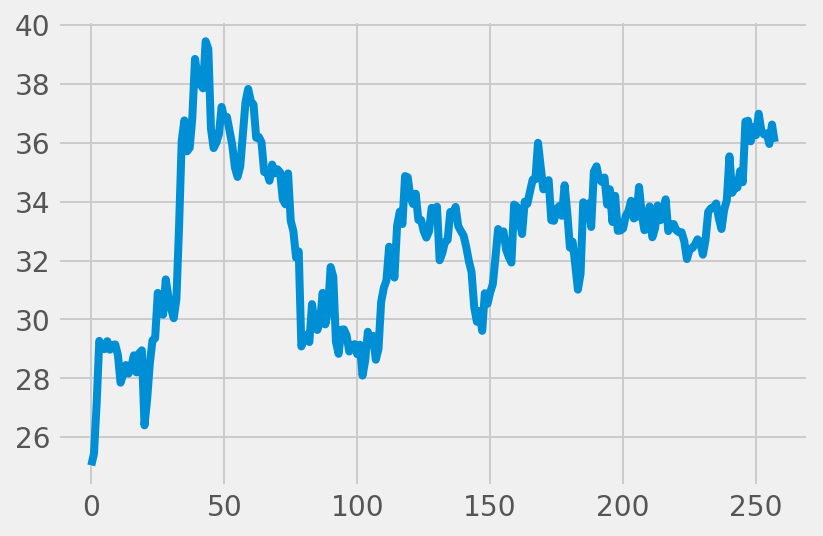

In [498]:
plt.plot(y)

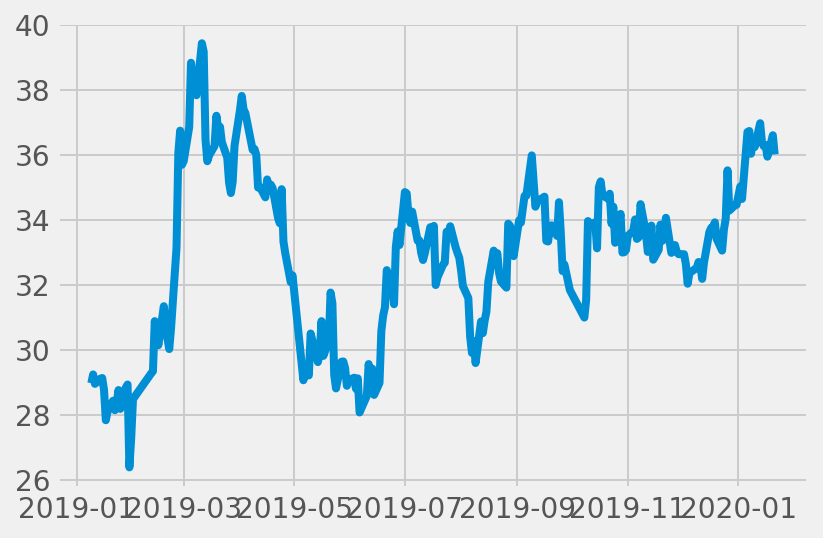

In [499]:
to_y=[]
for i in range(len(y)):
    to_y.extend(y.tolist()[i])
to_y = pd.Series(to_y[5:], index=date[5:]) 
plt.plot(to_y)

In [500]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler
# X = regularize(X)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

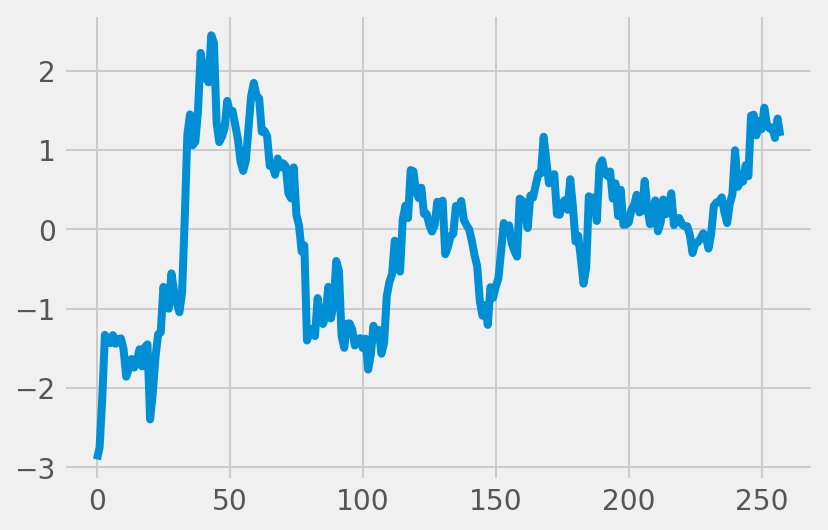

In [501]:
plt.plot(y)

In [502]:
y[0:3]

array([[-2.90014809],
       [-2.75175879],
       [-2.124814  ]])

In [503]:
X[0]

array([-0.26957147,  0.56608868, -1.04347946, -1.16964703, -1.75606224,
        0.17274716, -2.9439099 , -1.59625119, -0.87424471,  0.94713189,
       16.02852071, 16.02005253])

In [504]:
np.size(X)/12

258.0

In [505]:
num = 5
X_1 = []
for i in range(len(y[num:])): 
    x=[]
    for j in range(num):
        x.extend(X[i:i+num].astype(float)[j])
    X_1.append(x)

In [506]:
X_1= np.array(X_1)
X_1[0]

array([-0.26957147,  0.56608868, -1.04347946, -1.16964703, -1.75606224,
        0.17274716, -2.9439099 , -1.59625119, -0.87424471,  0.94713189,
       16.02852071, 16.02005253,  0.12869798,  0.55590899, -0.91048168,
       -1.07067738, -1.58353071,  0.16615611, -2.94981239, -1.346122  ,
       -0.85385923,  0.94713189,  0.16355174,  0.48559375,  1.3311727 ,
        2.53597634, -0.3485663 , -0.65253024, -0.85458519,  0.13830894,
       -2.62891747, -0.6615042 , -0.49711334,  0.94713189,  0.12511712,
        0.1757015 ,  1.89938726,  3.02450539,  0.36297146, -0.12304235,
        0.06846019,  0.10304684, -2.51315488,  0.51812182,  0.78717185,
        0.94713189, -0.06398898, -0.06541705,  0.84856429, -0.40616135,
        0.27984789, -0.18489873, -0.0393724 ,  0.10716625, -2.55525383,
        0.41106716, -0.11998198, -1.05581916, -0.06398898, -0.06541705])

In [507]:
253-len(X_1)*0.2

202.4

In [508]:
np.size(X_1)/12

1265.0

In [509]:
198+55

253

In [511]:
#split train data and test data
from sklearn.model_selection import cross_val_score, train_test_split
X_train=X_1[:203]
X_test=X_1[203:]
y_train=y[5:208]
y_test=y[208:]

In [512]:
len(X_train)

203

In [513]:
len(X_test)

50

In [514]:
np.size(y_test)

50

In [515]:
# #4 Fitting the Support Vector Regression Model to the dataset
# # Create your support vector regressor here
# from sklearn.svm import SVR
# # most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
# model = SVR(C=100,gamma=0.01, kernel='rbf')

# model.fit(X_train, y_train)

In [516]:
X_train[0]

array([-0.26957147,  0.56608868, -1.04347946, -1.16964703, -1.75606224,
        0.17274716, -2.9439099 , -1.59625119, -0.87424471,  0.94713189,
       16.02852071, 16.02005253,  0.12869798,  0.55590899, -0.91048168,
       -1.07067738, -1.58353071,  0.16615611, -2.94981239, -1.346122  ,
       -0.85385923,  0.94713189,  0.16355174,  0.48559375,  1.3311727 ,
        2.53597634, -0.3485663 , -0.65253024, -0.85458519,  0.13830894,
       -2.62891747, -0.6615042 , -0.49711334,  0.94713189,  0.12511712,
        0.1757015 ,  1.89938726,  3.02450539,  0.36297146, -0.12304235,
        0.06846019,  0.10304684, -2.51315488,  0.51812182,  0.78717185,
        0.94713189, -0.06398898, -0.06541705,  0.84856429, -0.40616135,
        0.27984789, -0.18489873, -0.0393724 ,  0.10716625, -2.55525383,
        0.41106716, -0.11998198, -1.05581916, -0.06398898, -0.06541705])

In [517]:
y_test[0]

array([0.06392818])

In [518]:
len(train)

203

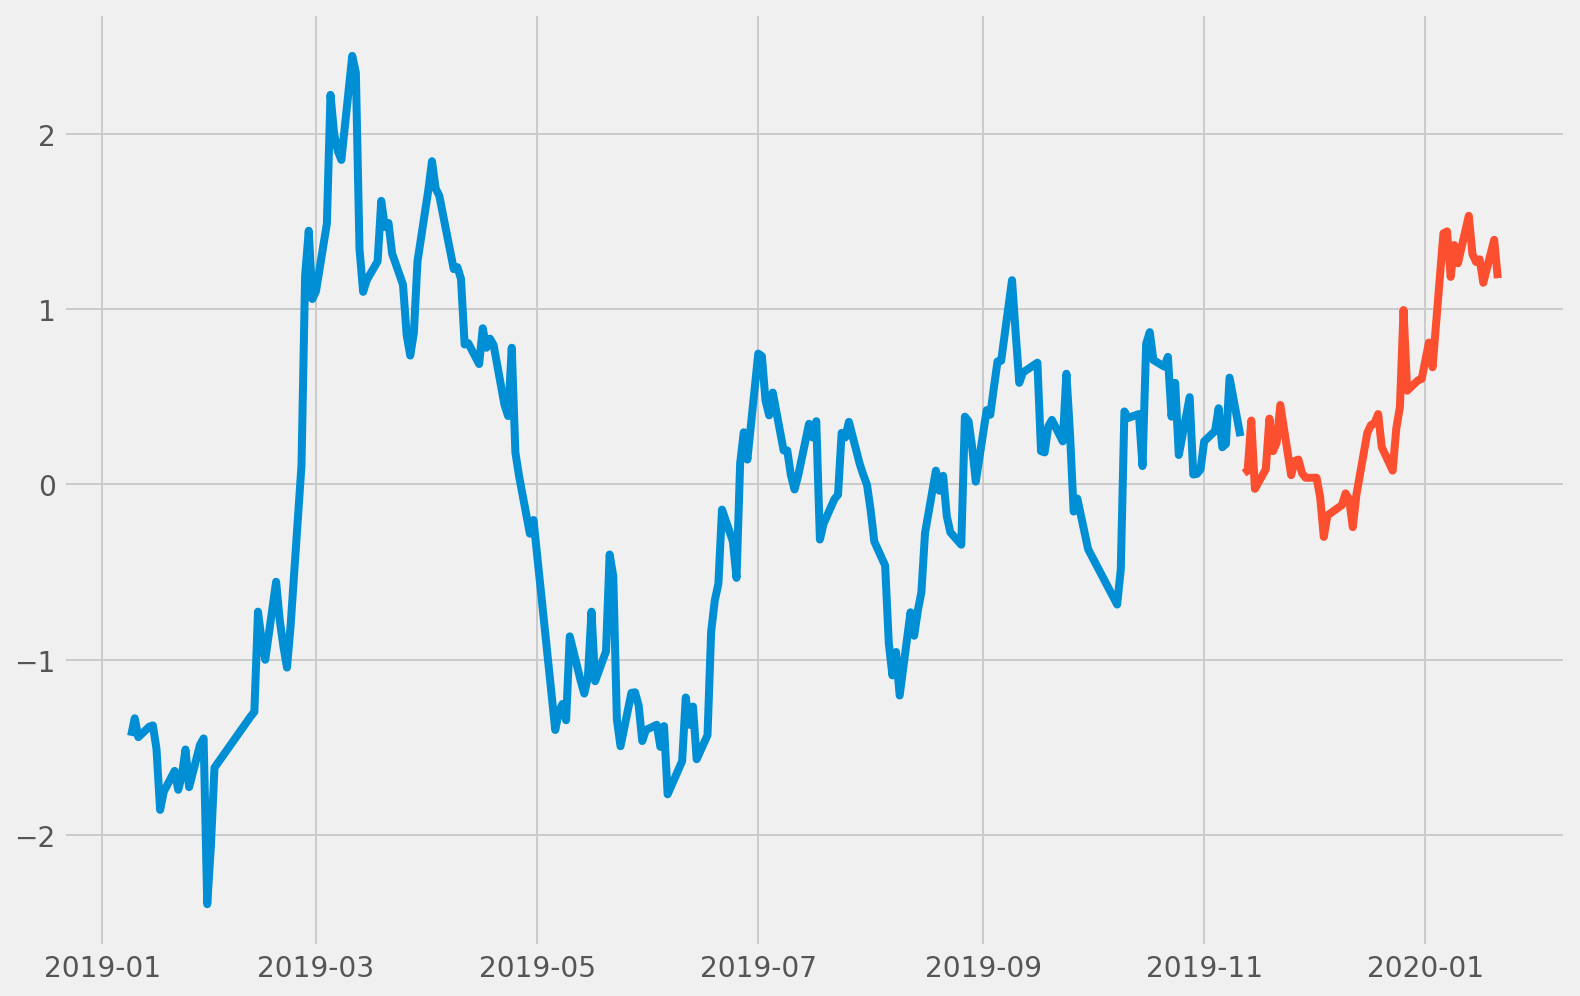

In [519]:
fig = plt.figure(figsize=(12,8))
train=[]
for i in range(len(y_train)):
    train.extend(y_train.tolist()[i])
train = pd.Series(train, index=date[5:208]) 
plt.plot(train)
test=[]
for i in range(len(y_test)):
    test.extend(y_test.tolist()[i])   
test = pd.Series(test,index=date[208:])
# test.index=test.index+202
plt.plot(test)

In [520]:
y_train[0]

array([-1.43480375])

In [521]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=10, iid=True)

grid.fit(X_train, y_train.T.ravel())

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:  6.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100], 'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [200]:
# model?

In [251]:
grid.best_params_

{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}

In [252]:
grid.best_score_

0.04383178407853807

In [326]:
grid.cv_results_

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/cheriehe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/cheriehe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/cheriehe/anacon

{'mean_fit_time': array([5.20534515e-03, 5.09636402e-03, 3.08489799e-03, 4.85532284e-03,
        4.79443073e-03, 2.90830135e-03, 3.19077969e-03, 3.26139927e-03,
        2.00419426e-03, 2.61752605e-03, 3.16843987e-03, 2.10471153e-03,
        2.22058296e-03, 2.49929428e-03, 2.55584717e-03, 2.79867649e-03,
        2.17974186e-03, 2.21517086e-03, 2.24871635e-03, 2.79774666e-03,
        2.39617825e-03, 3.09309959e-03, 3.46713066e-03, 4.65135574e-03,
        2.86302567e-03, 3.31187248e-03, 4.14874554e-03, 2.57587433e-03,
        3.23507786e-03, 4.32112217e-03, 2.44333744e-03, 3.26182842e-03,
        4.20498848e-03, 2.25481987e-03, 3.35116386e-03, 4.16340828e-03,
        2.15249062e-03, 1.83262825e-03, 4.28285599e-03, 2.42736340e-03,
        1.77025795e-03, 4.32088375e-03, 3.44843864e-03, 3.49547863e-03,
        1.58921242e-02, 3.97672653e-03, 4.17535305e-03, 1.88471079e-02,
        3.63626480e-03, 4.44440842e-03, 1.89129829e-02, 3.19528580e-03,
        4.03549671e-03, 1.51720762e-02, 2.41930

In [253]:
grid.score(X_test, y_test)

0.8120343689624746

In [254]:
grid.score(X_train, y_train)

0.9188688612771729

In [351]:
#5 Predicting a new result
grid.predict(X_test)

array([ 0.3402413 ,  0.03124063,  0.12700214,  0.32262286,  0.03928251,
        0.08661803,  0.43779281,  0.27715421,  0.18488107,  0.54134267,
        0.1439412 ,  0.12691835,  0.25579284,  0.15338278,  0.05081892,
        0.04677196, -0.03387895, -0.22267348, -0.12188529, -0.09285879,
       -0.03863335, -0.00218755,  0.05701505, -0.15024336, -0.05534182,
        0.4214933 ,  0.34207222,  0.38716854,  0.4483728 ,  0.28467833,
        0.15624449,  0.26699412,  0.37031664,  1.03174873,  0.54533372,
        0.52955253,  0.74022224,  0.80183969,  0.77802705,  1.51032194,
        1.35357276,  1.01689681,  1.3489457 ,  1.1249859 ,  1.45749055,
        1.3318086 ,  1.23796704,  1.18878656,  1.141736  ,  1.29377009])

In [45]:
grid?

In [256]:
grid.best_score_ 

0.04383178407853807

In [318]:
y_train_reverse = sc_y.inverse_transform(y_train)
y_train_reverse

array([[28.99],
       [29.26],
       [28.97],
       [29.13],
       [29.15],
       [28.79],
       [27.85],
       [28.13],
       [28.45],
       [28.16],
       [28.38],
       [28.78],
       [28.2 ],
       [28.85],
       [28.95],
       [26.4 ],
       [27.29],
       [28.5 ],
       [29.29],
       [29.36],
       [30.9 ],
       [30.46],
       [30.16],
       [31.36],
       [30.77],
       [30.37],
       [30.04],
       [30.69],
       [33.15],
       [36.07],
       [36.76],
       [35.71],
       [35.83],
       [36.87],
       [38.85],
       [38.25],
       [37.99],
       [37.85],
       [39.45],
       [39.19],
       [36.48],
       [35.82],
       [36.  ],
       [36.29],
       [37.22],
       [36.82],
       [36.88],
       [36.41],
       [35.93],
       [35.16],
       [34.84],
       [35.19],
       [36.29],
       [37.39],
       [37.83],
       [37.41],
       [37.3 ],
       [36.17],
       [36.2 ],
       [36.02],
       [35.01],
       [35.03],
       [

In [362]:
pre_reverse = sc_y.inverse_transform(grid.predict(X_test))
pre_reverse

array([33.77483299, 32.94188704, 33.20002292, 33.72734053, 32.96356483,
       33.09116302, 34.03779404, 33.60477466, 33.35604208, 34.31692429,
       33.24568406, 33.19979707, 33.5471927 , 33.27113491, 32.99466251,
       32.98375348, 32.7663499 , 32.25743308, 32.52911895, 32.60736313,
       32.75353388, 32.85177764, 33.01136489, 32.4526766 , 32.70849433,
       33.99385688, 33.77976846, 33.90133064, 34.06631358, 33.62505677,
       33.27884896, 33.57738702, 33.85590444, 35.63886882, 34.32768263,
       34.28514265, 34.85302649, 35.01912323, 34.95493359, 36.92891659,
       36.50638158, 35.5988338 , 36.49390884, 35.89020008, 36.78650364,
       36.44771384, 36.19475342, 36.0621819 , 35.93535185, 36.34517679])

In [365]:
# to_y[203:]

In [334]:
ytr=[]
for i in range(len(y_train)):
    ytr.extend(y_train.tolist()[i])
    
ytr = pd.Series(ytr)
# ytr.index = range(len(y_train))
# ytr.index=ytr.index+1

In [265]:
# len(ytr)
ytr = pd.Series(ytr)
ytr.count()

253

In [331]:
pre=pre_reverse
pre=pd.Series(pre.tolist(),index=date[208:])
# pre.index=range(202,len(pre)+202)

In [332]:
pre.head(3)

date
2019-11-12    33.774833
2019-11-13    32.941887
2019-11-14    33.200023
dtype: float64

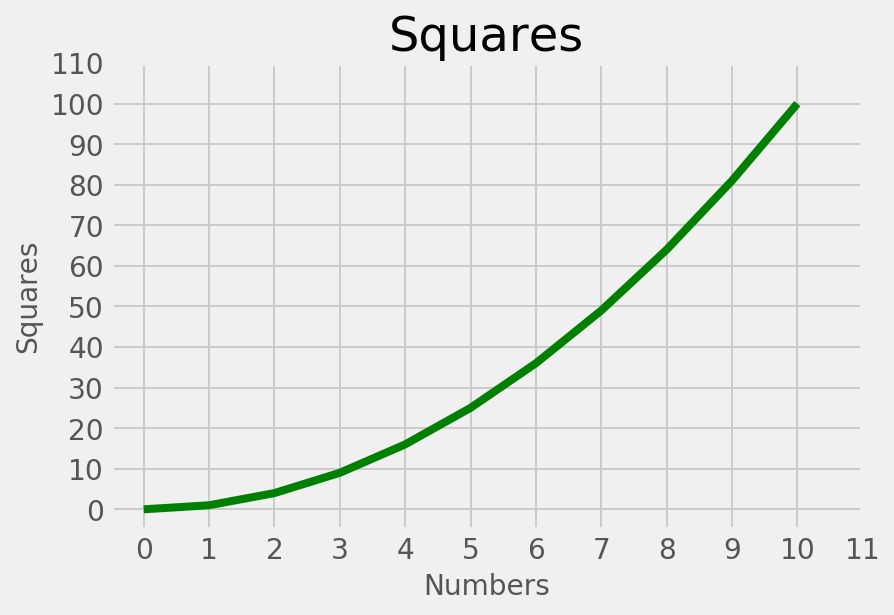

In [394]:
from matplotlib.pyplot import MultipleLocator
#‰ªépyplotÂØºÂÖ•MultipleLocatorÁ±ªÔºåËøô‰∏™Á±ªÁî®‰∫éËÆæÁΩÆÂàªÂ∫¶Èó¥Èöî
  
x_values=list(range(11))
y_values=[x**2 for x in x_values]
plt.plot(x_values,y_values,c='green')
plt.title('Squares',fontsize=24)
plt.tick_params(axis='both',which='major',labelsize=14)
plt.xlabel('Numbers',fontsize=14)
plt.ylabel('Squares',fontsize=14)
x_major_locator=MultipleLocator(1)
#ÊääxËΩ¥ÁöÑÂàªÂ∫¶Èó¥ÈöîËÆæÁΩÆ‰∏∫1ÔºåÂπ∂Â≠òÂú®ÂèòÈáèÈáå
y_major_locator=MultipleLocator(10)
#ÊääyËΩ¥ÁöÑÂàªÂ∫¶Èó¥ÈöîËÆæÁΩÆ‰∏∫10ÔºåÂπ∂Â≠òÂú®ÂèòÈáèÈáå
ax=plt.gca()
#ax‰∏∫‰∏§Êù°ÂùêÊ†áËΩ¥ÁöÑÂÆû‰æã
ax.xaxis.set_major_locator(x_major_locator)
#ÊääxËΩ¥ÁöÑ‰∏ªÂàªÂ∫¶ËÆæÁΩÆ‰∏∫1ÁöÑÂÄçÊï∞
ax.yaxis.set_major_locator(y_major_locator)
#ÊääyËΩ¥ÁöÑ‰∏ªÂàªÂ∫¶ËÆæÁΩÆ‰∏∫10ÁöÑÂÄçÊï∞
plt.xlim(-0.5,11)
#ÊääxËΩ¥ÁöÑÂàªÂ∫¶ËåÉÂõ¥ËÆæÁΩÆ‰∏∫-0.5Âà∞11ÔºåÂõ†‰∏∫0.5‰∏çÊª°‰∏Ä‰∏™ÂàªÂ∫¶Èó¥ÈöîÔºåÊâÄ‰ª•Êï∞Â≠ó‰∏ç‰ºöÊòæÁ§∫Âá∫Êù•Ôºå‰ΩÜÊòØËÉΩÁúãÂà∞‰∏ÄÁÇπÁ©∫ÁôΩ
plt.ylim(-5,110)
#ÊääyËΩ¥ÁöÑÂàªÂ∫¶ËåÉÂõ¥ËÆæÁΩÆ‰∏∫-5Âà∞110ÔºåÂêåÁêÜÔºå-5‰∏ç‰ºöÊ†áÂá∫Êù•Ôºå‰ΩÜÊòØËÉΩÁúãÂà∞‰∏ÄÁÇπÁ©∫ÁôΩ
plt.show()

In [425]:
news_dat = [dr.strftime("%Y-%m-%d") for dr in date[208:]]
np.size(news_dat)

50

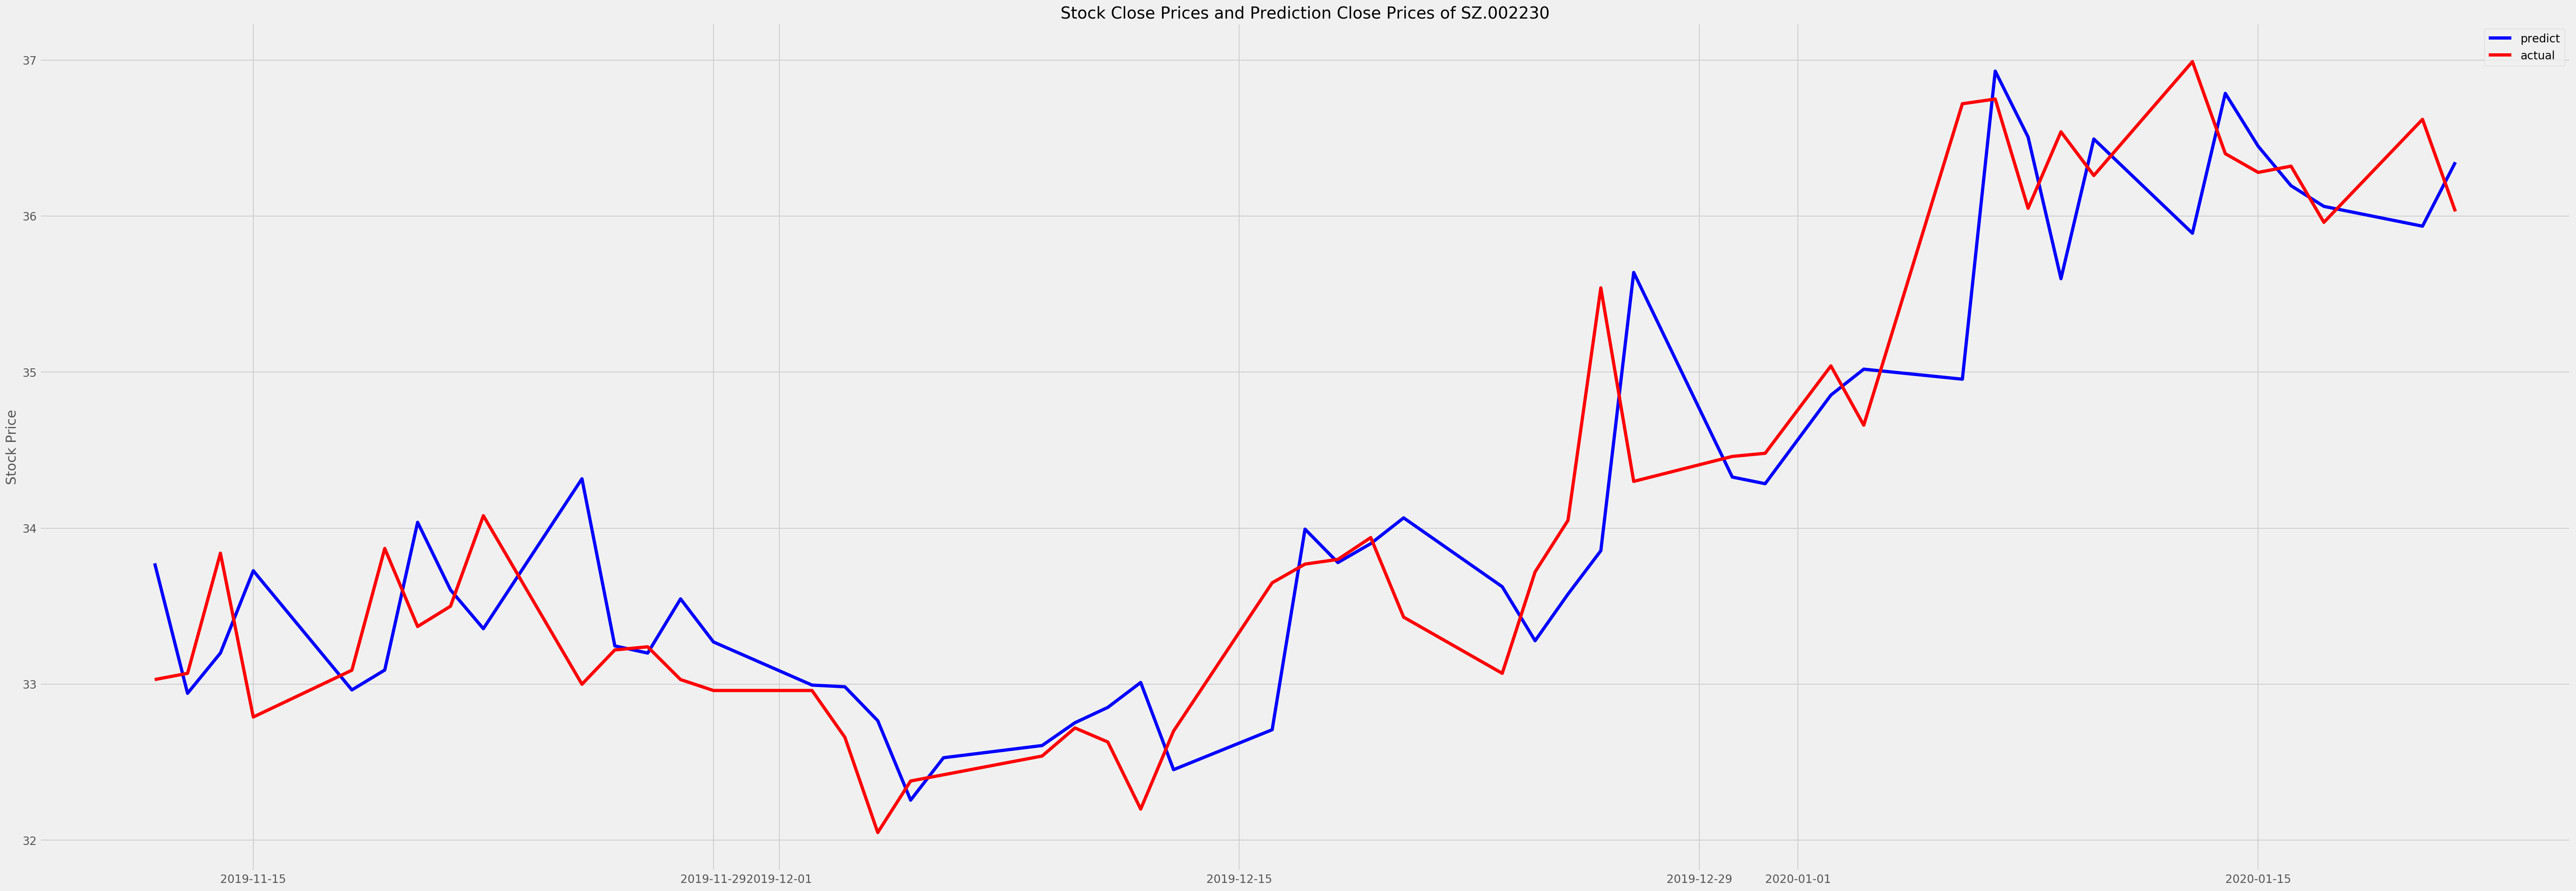

In [486]:
fig = plt.figure(figsize=(50,18))
# ax = fig.add_subplot(111)
# plt.xlabels=[x for x in news_dat]
plt.plot(pre,'b',label='predict')
plt.plot(to_y[203:],'r',label='actual')
# plt.xlabel('Months(2019-01‚Äî‚Äî2020-01)')   #xËΩ¥Ê†áÁ≠æ
plt.ylabel('Stock Price')            #yËΩ¥Ê†áÁ≠æ
# year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
# plt.xticks(np.arange(0,50,10)) #ÈáçÊñ∞ËÆæÁΩÆxËΩ¥Èó¥ÈöîÂíåÂàªÂ∫¶ÂÄº
plt.title('Stock Close Prices and Prediction Close Prices of SZ.002230')
plt.legend()
plt.show()

In [476]:
# ËÆ°ÁÆóÊ®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑMSEÂÄº
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,grid.predict(X_test))

0.05554218982485243

In [477]:
mean_squared_error(to_y[203:],pre)

0.4035875927163824

In [ ]:
writeToJson(X.iloc[round(len(X) * 0.7):round(len(X) * 0.7) + 10000, :])

In [ ]:
model = SVR(verbose = True)
model.fit(X.iloc[:round(len(X) * 0.7), :], y.iloc[:round(len(y) * 0.7)])

In [182]:
model.predict([[1, 1]])

array([1.5])

In [ ]:
# plt.plot(y_train,'lime',label='actual')
fig = plt.figure(figsize=(20,8))
plt.plot(pre,'b',label='predict')
plt.plot(y_train_reverse[100:],'r',label='actual',linewidth=2.5)
plt.legend()
plt.show()

In [ ]:
# import pandas as pd
# import csv

# for i in range(180,186):  # Áà¨ÂèñÂÖ®ÈÉ®185È°µÊï∞ÊçÆ
#     url = 'http://s.askci.com/stock/a/?reportTime=2019-12-31&pageNum=%s' % (str(i))
#     tb = pd.read_html(url)[3] #ÁªèËßÇÂØüÂèëÁé∞ÊâÄÈúÄË°®Ê†ºÊòØÁΩëÈ°µ‰∏≠Á¨¨4‰∏™Ë°®Ê†ºÔºåÊïÖ‰∏∫[3]
#     tb.to_csv(r'2019_12_31.csv', mode='a', encoding='utf_8_sig', header=1, index=0)
#     print('Á¨¨'+str(i)+'È°µÊäìÂèñÂÆåÊàê')

In [ ]:
# import pysnowball as ball
# baj = ball.quotec('SZ002230')['data'][0]
# # baj
# data_kdxf = pd.DataFrame(baj, index=range(1, len(baj)+1))
# data_kdxf